In [1]:
import pandas as pd
import psycopg2
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
import numpy as np
import requests
from talib import MACD, RSI
from datetime import datetime, timedelta, date

%matplotlib inline

In [2]:
start_day_to_analyze = '2020-02-03'
end_day_to_analyze = '2020-02-04'

In [3]:
base_url = "https://api.alpaca.markets"
api_key_id = "AKVKN4TLUUS5MZO5KYLM"
api_secret = "nkK2UmvE1kTFFw1ZlaqDmwCyiuCu7OOeB5y2La/X"

In [4]:
db_conn = create_engine("postgresql://momentum@localhost:5432/tradedb")

In [5]:
api = tradeapi.REST(
    base_url=base_url, key_id=api_key_id, secret_key=api_secret
)
session = requests.session()

In [6]:
query = f'''
SELECT * 
FROM 
trades 
WHERE 
    buy_time >= '{start_day_to_analyze}' and 
    buy_time < '{end_day_to_analyze}' 
ORDER BY symbol, buy_time
'''

In [7]:
trades =  pd.read_sql_query(query, db_conn)

In [8]:
trades

trade_id  algo_run_id  is_win symbol   qty  buy_price  \
0         478           48   False   AAOI   156      11.79   
1         532           48   False   AKBA  1319       7.57   
2         529           48   False   AMRS  1679       2.76   
3         534           48    True   AMRS  1421       2.77   
4         493           48    True   ANVS   164       7.35   
..        ...          ...     ...    ...   ...        ...   
104       544           48   False    UBX   210       7.02   
105       503           48   False    VNE   710      13.56   
106       526           48   False   VNTR  2309       2.93   
107       489           48   False    WLL   972       4.72   
108       511           48   False   WPRT  2153       2.69   

                                        buy_indicators  \
0    {'rsi': 70.47337781874809, 'macd1': [0.0774179...   
1    {'rsi': 66.90081514876974, 'macd1': [0.0061942...   
2    {'rsi': 60.91214645272517, 'macd1': [-0.005143...   
3    {'rsi': 65.05656489739012, 'macd1': [-0.004594...   
4    {'rsi': 70.60069703413812, 'macd1': [0.0932140...   
..                                                 ...   
104  {'rsi': 71.17097996518505, 'macd1': [0.0809392...   
105  {'rsi': 65.99847954357914, 'macd1': [0.0167970...   
106  {'rsi': 65.53606232161587, 'macd1': [0.0108596...   
107  {'rsi': 65.07811627251837, 'macd1': [0.0273585...   
108  {'rsi': 61.07658393105157, 'macd1': [0.0051140...   

                      buy_time  sell_price  \
0   2020-02-03 15:12:32.935025       11.73   
1   2020-02-03 16:02:00.016467        7.57   
2   2020-02-03 16:01:10.746144        2.76   
3   2020-02-03 16:02:06.837887        2.90   
4   2020-02-03 15:21:03.579864        7.51   
..                         ...         ...   
104 2020-02-03 16:05:09.632292        6.64   
105 2020-02-03 15:28:26.954366       13.41   
106 2020-02-03 15:57:25.869741        2.88   
107 2020-02-03 15:19:22.965442        4.64   
108 2020-02-03 15:39:02.710788        2.66   

                                       sell_indicators  \
0    {'rsi': 36.83691748856382, 'macd': [0.00264268...   
1    {'rsi': 37.328877377156765, 'macd': [0.0026126...   
2    {'rsi': 60.91214645272517, 'macd': [-0.0031537...   
3    {'rsi': 45.93719101595878, 'macd': [0.00180952...   
4    {'rsi': 44.966902757094665, 'macd': [0.0107272...   
..                                                 ...   
104  {'rsi': 33.40678309897551, 'macd': [0.03197163...   
105  {'rsi': 37.92992010841589, 'macd': [-0.0023430...   
106  {'rsi': 36.78616401969043, 'macd': [0.00397458...   
107  {'rsi': 42.00660661288171, 'macd': [0.00450337...   
108  {'rsi': 36.20309973892511, 'macd': [-0.0022801...   

                     sell_time                client_sell_time  \
0   2020-02-03 15:53:42.471448  2020-02-03T15:53:46.254586843Z   
1   2020-02-03 16:44:47.457839  2020-02-03T16:44:47.245850024Z   
2   2020-02-03 16:01:29.477957  2020-02-03T16:02:02.214019978Z   
3   2020-02-03 17:14:04.542628  2020-02-03T17:14:04.362611911Z   
4   2020-02-03 16:50:19.347129  2020-02-03T16:50:20.379227943Z   
..                         ...                             ...   
104 2020-02-03 16:17:47.556252  2020-02-03T16:18:19.274183266Z   
105 2020-02-03 15:49:32.666245  2020-02-03T15:51:39.373152248Z   
106 2020-02-03 16:12:31.267763  2020-02-03T16:16:32.184965961Z   
107 2020-02-03 15:34:01.767813  2020-02-03T15:38:02.304980426Z   
108 2020-02-03 16:34:59.439686  2020-02-03T16:34:59.270195475Z   

                    client_buy_time  
0    2020-02-03T15:12:32.845241982Z  
1    2020-02-03T16:01:59.540887312Z  
2    2020-02-03T16:01:10.548927625Z  
3    2020-02-03T16:02:06.703792262Z  
4    2020-02-03T15:21:03.490255679Z  
..                              ...  
104  2020-02-03T16:05:09.551757225Z  
105  2020-02-03T15:28:26.897070783Z  
106  2020-02-03T15:57:25.603853873Z  
107  2020-02-03T15:19:22.894255306Z  
108   2020-02-03T15:39:02.63179091Z  

[109 rows x 13 columns]

In [9]:
trade_details = {}

for index, row in trades.iterrows():
    symbol = row['symbol']
    buy_time = row['client_buy_time']
    buy_price = row['buy_price']
    sell_time = row['client_sell_time']
    sell_price = row['sell_price']
    buy_indicator = row['buy_indicators']
    sell_indicator = row['sell_indicators']
                    
    if symbol not in trade_details:
        trade_details[symbol] = []
    trade_details[symbol].append((buy_time, buy_price, sell_time, sell_price, buy_indicator, sell_indicator))

In [10]:
symbols = trades['symbol'].value_counts()

In [11]:
len(symbols)

67

In [12]:
symbols

PCG     11
BIMI     6
JDST     6
BE       4
DUST     3
        ..
GRWG     1
HMI      1
DBD      1
EZPW     1
ETM      1
Name: symbol, Length: 67, dtype: int64

In [13]:
minute_history = {}
for symbol, count in symbols.items():
    minute_history[symbol] = api.polygon.historic_agg_v2(
        symbol, 
        1, 
        'minute', 
        _from = start_day_to_analyze, 
        to=end_day_to_analyze, 
        limit=5000).df

PCG analysis


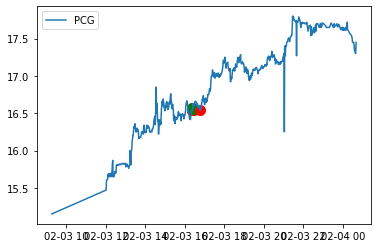

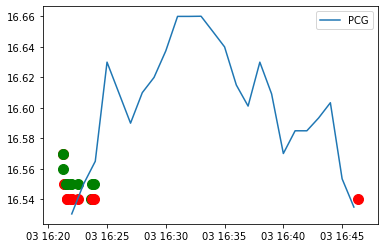

Delta = -0.08000000000000895


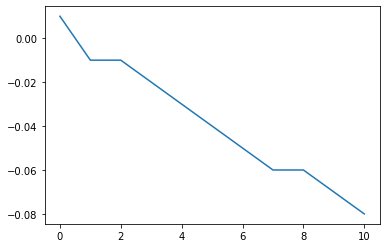

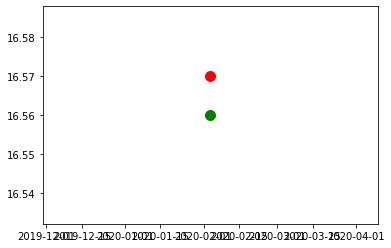

buy time:2020-02-03T16:21:14.516531117Z sell time:2020-02-03T16:21:15.403027602Z
{'rsi': 57.65310373352579, 'macd1': [-0.019455915964531556, -0.018930681935572125, -0.01670002072273391, -0.01117229446512269, -0.004719833215258262], 'macd2': [0.02574754023304493, 0.024432622738022047, 0.023505251427746288, 0.023334158908493663, 0.023539268655621726], 'macd_signal': [0.001990596747866972, -0.0021936589888208475, -0.00509493133560346, -0.006310403961507306, -0.005992289812257497]}
{'rsi': 58.72758056248366, 'macd': [-0.013392408437304937, -0.012943951967574918, -0.01138224625132267, -0.007679848988644267, -0.002876943991896752], 'too_close': 0, 'macd_signal': [0.0006884544235463861, -0.002038026854677875, -0.003906870734006834, -0.004661466384934321, -0.004304561906326807], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': 0.001427617914430055}


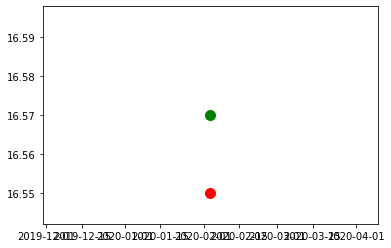

buy time:2020-02-03T16:21:16.691743356Z sell time:2020-02-03T16:21:21.788897364Z
{'rsi': 58.72758056248366, 'macd1': [-0.019455915964531556, -0.018930681935572125, -0.01670002072273391, -0.01117229446512269, -0.0039221124175341515], 'macd2': [0.02574754023304493, 0.024432622738022047, 0.023505251427746288, 0.023334158908493663, 0.023699204681211228], 'macd_signal': [0.001990596747866972, -0.0021936589888208475, -0.00509493133560346, -0.006310403961507306, -0.005832745652712675]}
{'rsi': 56.52118613118301, 'macd': [-0.013392408437304937, -0.012943951967574918, -0.01138224625132267, -0.007679848988644267, -0.003915905030858369], 'too_close': 0, 'macd_signal': [0.0006884544235463861, -0.002038026854677875, -0.003906870734006834, -0.004661466384934321, -0.0045123541141191305], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': 0.0005964490832607618}


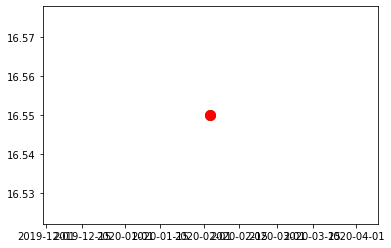

buy time:2020-02-03T16:21:22.989376407Z sell time:2020-02-03T16:21:24.209716709Z
{'rsi': 56.52118613118301, 'macd1': [-0.019455915964531556, -0.018930681935572125, -0.01670002072273391, -0.01117229446512269, -0.005517554012975268], 'macd2': [0.02574754023304493, 0.024432622738022047, 0.023505251427746288, 0.023334158908493663, 0.023379332630032224], 'macd_signal': [0.001990596747866972, -0.0021936589888208475, -0.00509493133560346, -0.006310403961507306, -0.006151833971800898]}
{'rsi': 56.52118613118301, 'macd': [-0.013392408437304937, -0.012943951967574918, -0.01138224625132267, -0.007679848988644267, -0.003915905030858369], 'too_close': 0, 'macd_signal': [0.0006884544235463861, -0.002038026854677875, -0.003906870734006834, -0.004661466384934321, -0.0045123541141191305], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': 0.0005964490832607618}


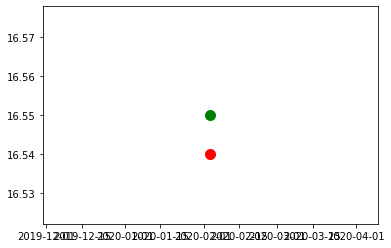

buy time:2020-02-03T16:21:32.827462575Z sell time:2020-02-03T16:21:33.745967145Z
{'rsi': 57.642076367530294, 'macd1': [-0.019455915964531556, -0.018930681935572125, -0.01670002072273391, -0.01117229446512269, -0.004727810423233336], 'macd2': [0.02574754023304493, 0.024432622738022047, 0.023505251427746288, 0.023334158908493663, 0.02353766929536505], 'macd_signal': [0.001990596747866972, -0.0021936589888208475, -0.00509493133560346, -0.006310403961507306, -0.005993885253852512]}
{'rsi': 55.93222813104276, 'macd': [-0.013392408437304937, -0.012943951967574918, -0.01138224625132267, -0.007679848988644267, -0.004175645290597885], 'too_close': 0, 'macd_signal': [0.0006884544235463861, -0.002038026854677875, -0.003906870734006834, -0.004661466384934321, -0.0045643021660670335], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': 0.0003886568754691488}


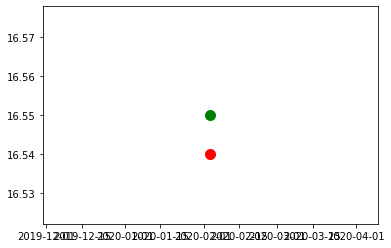

buy time:2020-02-03T16:21:34.51691248Z sell time:2020-02-03T16:21:35.477895151Z
{'rsi': 56.52118613118301, 'macd1': [-0.019455915964531556, -0.018930681935572125, -0.01670002072273391, -0.01117229446512269, -0.005517554012975268], 'macd2': [0.02574754023304493, 0.024432622738022047, 0.023505251427746288, 0.023334158908493663, 0.023379332630032224], 'macd_signal': [0.001990596747866972, -0.0021936589888208475, -0.00509493133560346, -0.006310403961507306, -0.006151833971800898]}
{'rsi': 55.32709513945462, 'macd': [-0.013392408437304937, -0.012943951967574918, -0.01138224625132267, -0.007679848988644267, -0.004435385550340953], 'too_close': 0, 'macd_signal': [0.0006884544235463861, -0.002038026854677875, -0.003906870734006834, -0.004661466384934321, -0.004616250218015648], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': 0.00018086466767469438}


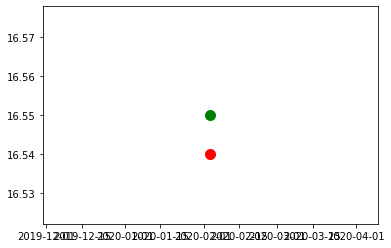

buy time:2020-02-03T16:21:55.935697253Z sell time:2020-02-03T16:21:57.385455268Z
{'rsi': 56.52118613118301, 'macd1': [-0.019455915964531556, -0.018930681935572125, -0.01670002072273391, -0.01117229446512269, -0.005517554012975268], 'macd2': [0.02574754023304493, 0.024432622738022047, 0.023505251427746288, 0.023334158908493663, 0.023379332630032224], 'macd_signal': [0.001990596747866972, -0.0021936589888208475, -0.00509493133560346, -0.006310403961507306, -0.006151833971800898]}
{'rsi': 55.32709513945462, 'macd': [-0.013392408437304937, -0.012943951967574918, -0.01138224625132267, -0.007679848988644267, -0.004435385550340953], 'too_close': 0, 'macd_signal': [0.0006884544235463861, -0.002038026854677875, -0.003906870734006834, -0.004661466384934321, -0.004616250218015648], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': 0.00018086466767469438}


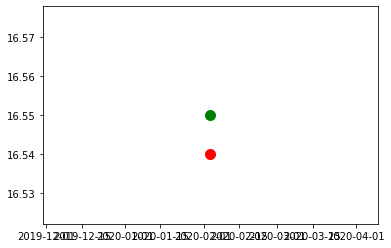

buy time:2020-02-03T16:21:58.480070795Z sell time:2020-02-03T16:21:59.213154155Z
{'rsi': 56.52118613118301, 'macd1': [-0.019455915964531556, -0.018930681935572125, -0.01670002072273391, -0.01117229446512269, -0.005517554012975268], 'macd2': [0.02574754023304493, 0.024432622738022047, 0.023505251427746288, 0.023334158908493663, 0.023379332630032224], 'macd_signal': [0.001990596747866972, -0.0021936589888208475, -0.00509493133560346, -0.006310403961507306, -0.006151833971800898]}
{'rsi': 55.32709513945462, 'macd': [-0.013392408437304937, -0.012943951967574918, -0.01138224625132267, -0.007679848988644267, -0.004435385550340953], 'too_close': 0, 'macd_signal': [0.0006884544235463861, -0.002038026854677875, -0.003906870734006834, -0.004661466384934321, -0.004616250218015648], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': 0.00018086466767469438}


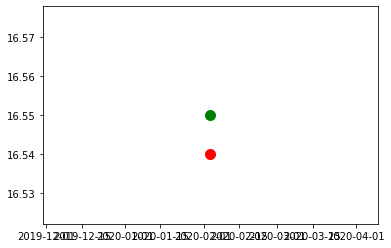

buy time:2020-02-03T16:22:30.643096231Z sell time:2020-02-03T16:22:31.359349165Z
{'rsi': 57.22479604854138, 'macd1': [-0.018930681935572125, -0.01670002072273391, -0.01117229446512269, -0.006315274810695826, -0.0012413673912945455], 'macd2': [0.024432622738022047, 0.023505251427746288, 0.023334158908493663, 0.02321939660443917, 0.02331657947207333], 'macd_signal': [-0.0021936589888208475, -0.00509493133560346, -0.006310403961507306, -0.00631137813134501, -0.005297375983334917]}
{'rsi': 56.460310410252426, 'macd': [-0.012943951967574918, -0.01138224625132267, -0.007679848988644267, -0.004435385550340953, -0.001392486954902239], 'too_close': 0, 'macd_signal': [-0.002038026854677875, -0.003906870734006834, -0.004661466384934321, -0.004616250218015648, -0.003971497565392966], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': 0.002579010610490727}


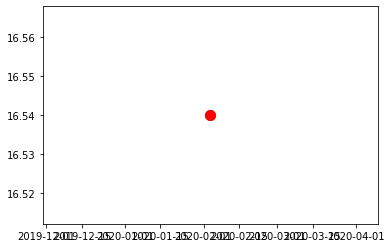

buy time:2020-02-03T16:23:39.408543166Z sell time:2020-02-03T16:23:42.435739544Z
{'rsi': 56.42076968544737, 'macd1': [-0.01670002072273391, -0.01117229446512269, -0.006315274810695826, -0.0031957833457099127, 0.000824282996894965], 'macd2': [0.023505251427746288, 0.023334158908493663, 0.02321939660443917, 0.022924736209382957, 0.02292565083798337], 'macd_signal': [-0.00509493133560346, -0.006310403961507306, -0.00631137813134501, -0.00568825917421799, -0.004385750739995399]}
{'rsi': 55.13547475340667, 'macd': [-0.01138224625132267, -0.007679848988644267, -0.004435385550340953, -0.0023431363055514964, -0.00018887538356793243], 'too_close': 0, 'macd_signal': [-0.003906870734006834, -0.004661466384934321, -0.004616250218015648, -0.004161627435522818, -0.0033670770251318406], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': 0.003178201641563908}


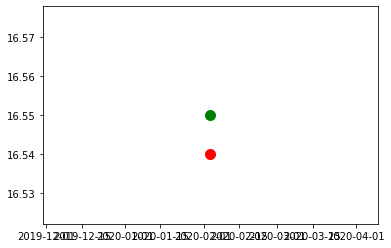

buy time:2020-02-03T16:23:44.601300078Z sell time:2020-02-03T16:23:52.253156181Z
{'rsi': 56.44623384540128, 'macd1': [-0.01670002072273391, -0.01117229446512269, -0.006315274810695826, -0.0031957833457099127, 0.0008402374128486656], 'macd2': [0.023505251427746288, 0.023334158908493663, 0.02321939660443917, 0.022924736209382957, 0.022928849558496722], 'macd_signal': [-0.00509493133560346, -0.006310403961507306, -0.00631137813134501, -0.00568825917421799, -0.004382559856804659]}
{'rsi': 55.13547475340667, 'macd': [-0.01138224625132267, -0.007679848988644267, -0.004435385550340953, -0.0023431363055514964, -0.00018887538356793243], 'too_close': 0, 'macd_signal': [-0.003906870734006834, -0.004661466384934321, -0.004616250218015648, -0.004161627435522818, -0.0033670770251318406], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': 0.003178201641563908}


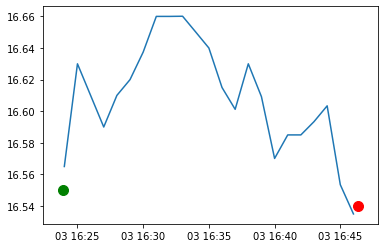

buy time:2020-02-03T16:23:53.616988081Z sell time:2020-02-03T16:46:19.366998057Z
{'rsi': 56.44623384540128, 'macd1': [-0.01670002072273391, -0.01117229446512269, -0.006315274810695826, -0.0031957833457099127, 0.0008402374128486656], 'macd2': [0.023505251427746288, 0.023334158908493663, 0.02321939660443917, 0.022924736209382957, 0.022928849558496722], 'macd_signal': [-0.00509493133560346, -0.006310403961507306, -0.00631137813134501, -0.00568825917421799, -0.004382559856804659]}
{'rsi': 41.44316705740166, 'macd': [0.007328244869519551, 0.006160303585275528, 0.00568969604449876, 0.0026568889212406077, -0.00044214116079999144], 'too_close': 1, 'macd_signal': [0.013783309697567669, 0.01225870847510924, 0.010944905988987143, 0.009287302575437837, 0.007341413828190271], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.007783554988990263}
BIMI analysis


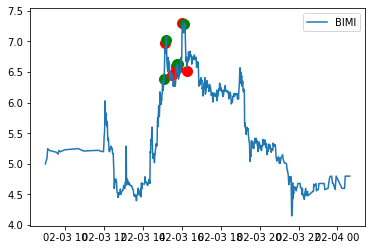

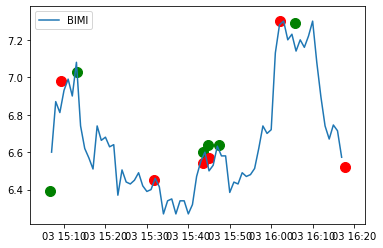

Delta = -0.22999999999999865


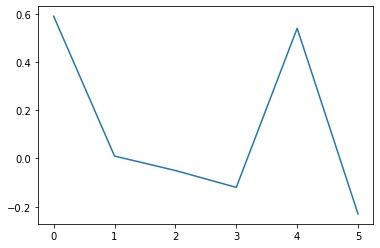

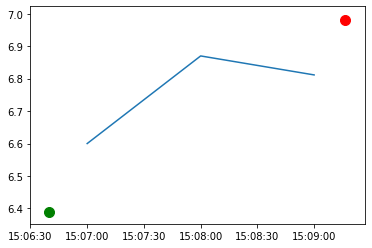

buy time:2020-02-03T15:06:39.882650859Z sell time:2020-02-03T15:09:16.522207905Z
{'rsi': 68.25807466351095, 'macd1': [0.24765676556071003, 0.24446733076073013, 0.23678937095150676, 0.2392435121727532, 0.2424284545862907], 'macd2': [0.14793901923725716, 0.15265845125725885, 0.1562765157406627, 0.16159441270721597, 0.16702828046779583], 'macd_signal': [0.22948170249357258, 0.2324788281470041, 0.23334093670790462, 0.23452145180087433, 0.2361028523579576]}
{'rsi': 78.05366332205405, 'macd': [0.142540767378728, 0.14570680972167427, 0.1556322088236879, 0.17537106255482016, 0.19263028542901584], 'too_close': 0, 'macd_signal': [0.14192910451025234, 0.14268464555253674, 0.14527415820676698, 0.1512935390763776, 0.15956088834690524], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': 0.033069397082110596}


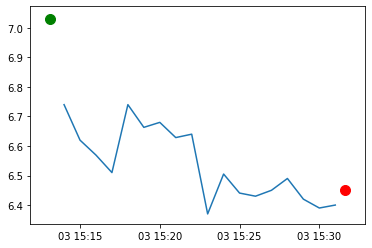

buy time:2020-02-03T15:13:06.615450789Z sell time:2020-02-03T15:31:36.61332834Z
{'rsi': 74.93684413149136, 'macd1': [0.30815433234342926, 0.32689644588098243, 0.34264144713255806, 0.34389304130820797, 0.35212271718590316], 'macd2': [0.19630047486937308, 0.20643378029611092, 0.21638619959468652, 0.22375723998158925, 0.23242006883818167], 'macd_signal': [0.26282850974740873, 0.27564209697412345, 0.28904196700581036, 0.30001218186628986, 0.3104342889302125]}
{'rsi': 48.34699683392588, 'macd': [0.02244683048147067, 0.01797277770976713, 0.010616726488832384, 0.003188417401236876, -0.0012594652306727738], 'too_close': 0, 'macd_signal': [0.06699329019142551, 0.05718918769509383, 0.04787469545384154, 0.03893743984332061, 0.030898058828521934], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.03215752405919471}


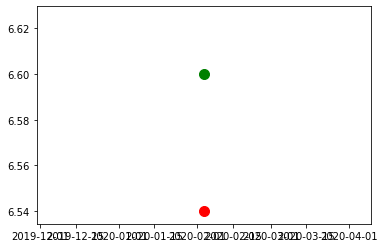

buy time:2020-02-03T15:43:27.573631195Z sell time:2020-02-03T15:43:28.290899173Z
{'rsi': 59.527480008333875, 'macd1': [-0.031157227815677757, -0.03720607569220835, -0.03753259667020625, -0.025394884084077418, -0.004467674689428769], 'macd2': [0.14138744954173177, 0.13558819847955306, 0.13083552775264717, 0.12865270589994005, 0.1286697855054264], 'macd_signal': [-0.004869211981898029, -0.011336584723960094, -0.016575787113209325, -0.018339606507382943, -0.015565220143792108]}
{'rsi': 57.063306031174974, 'macd': [-0.02792158796808497, -0.031130484783751022, -0.030629229253311685, -0.02204865053799132, -0.011195619713872063], 'too_close': 0, 'macd_signal': [-0.013839063995158973, -0.01729734815287738, -0.01996372437296424, -0.020380709605969657, -0.018543691627550138], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': 0.007348071913678075}


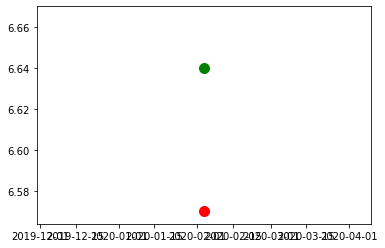

buy time:2020-02-03T15:44:38.042517886Z sell time:2020-02-03T15:44:56.258137164Z
{'rsi': 61.113074645456464, 'macd1': [-0.03720607569220835, -0.03753259667020625, -0.025394884084077418, -0.009214113435866977, 0.01138579648436533], 'macd2': [0.13558819847955306, 0.13083552775264717, 0.12865270589994005, 0.12771816615316745, 0.12822146538469958], 'macd_signal': [-0.011336584723960094, -0.016575787113209325, -0.018339606507382943, -0.01651450789307975, -0.010934447017590734]}
{'rsi': 58.52466622127811, 'macd': [-0.031130484783751022, -0.030629229253311685, -0.02204865053799132, -0.010920295038546968, -0.00055378042808929], 'too_close': 0, 'macd_signal': [-0.01729734815287738, -0.01996372437296424, -0.020380709605969657, -0.01848862669248512, -0.014901657439605953], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': 0.014347877011516663}


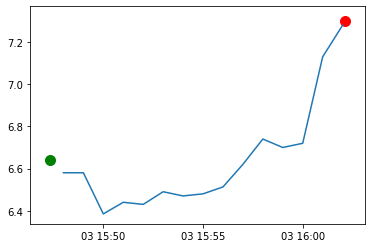

buy time:2020-02-03T15:47:19.534478376Z sell time:2020-02-03T16:02:06.93473929Z
{'rsi': 59.78856631153088, 'macd1': [-0.009214113435866977, 0.007556736655304874, 0.012632966935791856, 0.01885926738989685, 0.03229743136516561], 'macd2': [0.12771816615316745, 0.12745377246186873, 0.12540731705462171, 0.1238037492176387, 0.12388970499941898], 'macd_signal': [-0.01651450789307975, -0.011700258983402826, -0.00683361379956389, -0.0016950375616717412, 0.005103456223695729]}
{'rsi': 78.05072459738388, 'macd': [0.02547523343541247, 0.031730193263700635, 0.03722587373686359, 0.06232347055053822, 0.08990700741118651], 'too_close': 0, 'macd_signal': [0.01243427936816143, 0.01629346214726927, 0.020479944465188134, 0.02884864968225815, 0.041060321228043824], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': 0.04884668618314269}


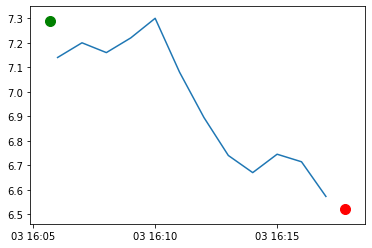

buy time:2020-02-03T16:05:40.899984146Z sell time:2020-02-03T16:17:47.426933162Z
{'rsi': 73.78810773716319, 'macd1': [0.0993831775448184, 0.14055450368356492, 0.17280492155655924, 0.18813382534244916, 0.20517118499985543], 'macd2': [0.11073856067330023, 0.11947191682905345, 0.12763567726370795, 0.13334470167437829, 0.1398217454017887], 'macd_signal': [0.04817357545290558, 0.06664976109903745, 0.0878807931905418, 0.10793139962092327, 0.1273793566967097]}
{'rsi': 37.913407878194036, 'macd': [0.06843301081458186, 0.04450737914183289, 0.0291873105768099, 0.015270538830339575, -0.0058395500478232165], 'too_close': 1, 'macd_signal': [0.09929697929962925, 0.08833905926806998, 0.07650870952981796, 0.06426107538992229, 0.05024095030237319], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.056080500350196405}
JDST analysis


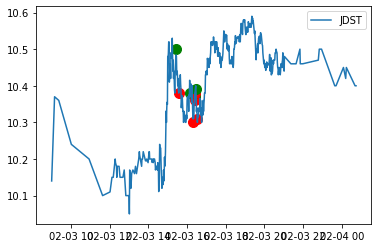

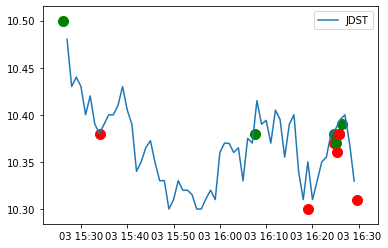

Delta = -0.3000000000000007


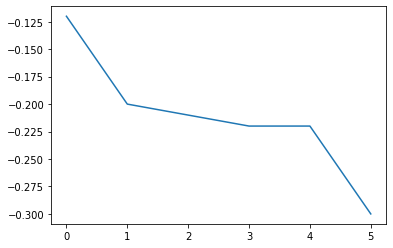

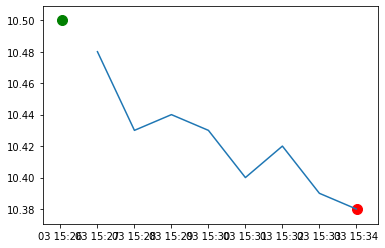

buy time:2020-02-03T15:26:02.784816976Z sell time:2020-02-03T15:34:01.633765496Z
{'rsi': 59.88537699999561, 'macd1': [0.026398998787460215, 0.024441784496458396, 0.02501500082691166, 0.02677447230146157, 0.0294432949974599], 'macd2': [0.06293811379349101, 0.06205620701723902, 0.061623783058733395, 0.061447252606612324, 0.06150643470147088], 'macd_signal': [0.048653769198092625, 0.04381137225776578, 0.04005209797159496, 0.03739657283756828, 0.03580591726954661]}
{'rsi': 44.73979275351336, 'macd': [0.008520961891928636, 0.005406737798862693, 0.003948813339345492, 0.0012030434573926385, -0.001211881690329264], 'too_close': 1, 'macd_signal': [0.013851614323901303, 0.01216263901889358, 0.010519873882983963, 0.008656507797865698, 0.006682829900226705], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.00789471159055597}


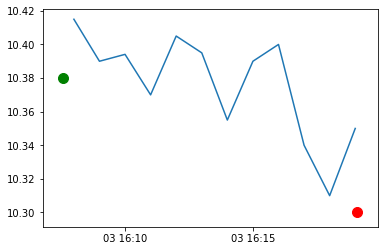

buy time:2020-02-03T16:07:33.393053453Z sell time:2020-02-03T16:19:05.086291026Z
{'rsi': 57.0448353801774, 'macd1': [-0.007099070366475502, -0.0047428994201599295, -0.005634869198171799, -0.002679747295497137, 0.00046377838090627677], 'macd2': [0.011228517390467374, 0.011037824287402742, 0.010284950985804286, 0.01029554623933393, 0.010448763949614914], 'macd_signal': [-0.016174938716703356, -0.01388853085739467, -0.012237798525550096, -0.010326188279539504, -0.008168194947450347]}
{'rsi': 39.99637753603791, 'macd': [0.00596368909873668, 0.006663417940538707, 0.004005240181676584, 0.0003234751724114915, -0.003069114122762784], 'too_close': 1, 'macd_signal': [0.004267298557668163, 0.004746522434242272, 0.004598265983729134, 0.003743307821465606, 0.002380823432619928], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.005449937555382712}


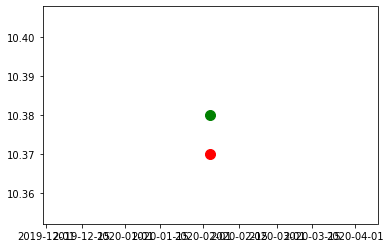

buy time:2020-02-03T16:24:34.500606061Z sell time:2020-02-03T16:24:36.290156833Z
{'rsi': 53.471600059353165, 'macd1': [-0.005038492656279203, -0.006630031456781538, -0.006174057224049179, -0.005347592429469472, -0.00264483405845084], 'macd2': [0.007421921881178406, 0.006686792876489989, 0.006326025578889727, 0.0060639585440664945, 0.006212990098923399], 'macd_signal': [0.002106665265619704, 0.0003593259211394555, -0.0009473507078982715, -0.0018273990522125116, -0.001990886053460177]}
{'rsi': 52.43633243707736, 'macd': [-0.0031631334778374764, -0.004201083915120307, -0.0038955766725496943, -0.0033471869163559376, -0.001956919743786756], 'too_close': 0, 'macd_signal': [0.0016876164661130935, 0.0005098763898664133, -0.00037121422261680815, -0.0009664087613646341, -0.0011645109578490584], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.0007924087859376974}


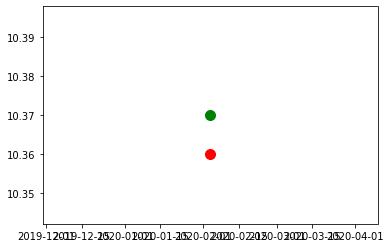

buy time:2020-02-03T16:25:09.939865943Z sell time:2020-02-03T16:25:18.383750303Z
{'rsi': 53.122168635644826, 'macd1': [-0.005038492656279203, -0.006630031456781538, -0.006174057224049179, -0.005347592429469472, -0.0028442642578809796], 'macd2': [0.007421921881178406, 0.006686792876489989, 0.006326025578889727, 0.0060639585440664945, 0.006173006092526023], 'macd_signal': [0.002106665265619704, 0.0003593259211394555, -0.0009473507078982715, -0.0018273990522125116, -0.002030772093346205]}
{'rsi': 50.244882512930545, 'macd': [-0.004201083915120307, -0.0038955766725496943, -0.0033471869163559376, -0.001577698964563723, -0.0012173486259641209], 'too_close': 0, 'macd_signal': [0.0005098763898664133, -0.00037121422261680815, -0.0009664087613646341, -0.0010886668020044519, -0.0011144031667963857], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.0001029454591677352}


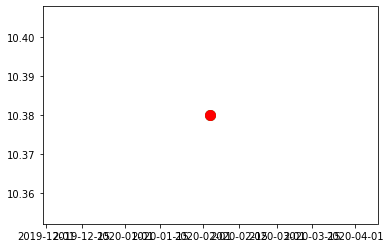

buy time:2020-02-03T16:25:38.406698092Z sell time:2020-02-03T16:25:39.361849658Z
{'rsi': 54.53725747386934, 'macd1': [-0.006630031456781538, -0.006174057224049179, -0.005347592429469472, -0.00264483405845084, 8.518841523397214e-05], 'macd2': [0.006686792876489989, 0.006326025578889727, 0.0060639585440664945, 0.006212990098923399, 0.006456920385740972], 'macd_signal': [0.0003593259211394555, -0.0009473507078982715, -0.0018273990522125116, -0.001990886053460177, -0.0015756711597213473]}
{'rsi': 53.471600059353165, 'macd': [-0.004201083915120307, -0.0038955766725496943, -0.0033471869163559376, -0.001577698964563723, -0.0001783875870042806], 'too_close': 0, 'macd_signal': [0.0005098763898664133, -0.00037121422261680815, -0.0009664087613646341, -0.0010886668020044519, -0.0009066109590044176], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': 0.000728223372000137}


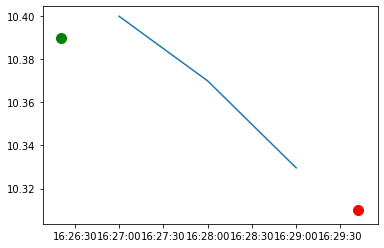

buy time:2020-02-03T16:26:20.55911671Z sell time:2020-02-03T16:29:42.127124119Z
{'rsi': 55.71401479850325, 'macd1': [-0.006174057224049179, -0.005347592429469472, -0.00264483405845084, -9.82873682406904e-05, 0.0026957111767202946], 'macd2': [0.006326025578889727, 0.0060639585440664945, 0.006212990098923399, 0.006420135099853397, 0.006760383043372897], 'macd_signal': [-0.0009473507078982715, -0.0018273990522125116, -0.001990886053460177, -0.0016123663164162797, -0.0007507508177889648]}
{'rsi': 41.690389335487886, 'macd': [8.135267273523539e-05, 0.0018925441735824222, 0.003539023990171586, 0.0032175923668607, -0.0001915438638615541], 'too_close': 1, 'macd_signal': [-0.0008546629070565144, -0.000305221490928727, 0.0004636276052913356, 0.0010144205576052084, 0.0007732276733118558], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.0009647715371734099}
BE analysis


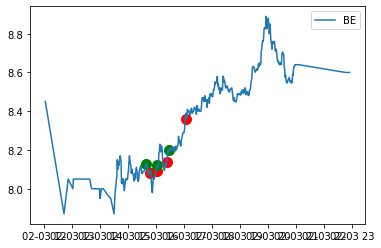

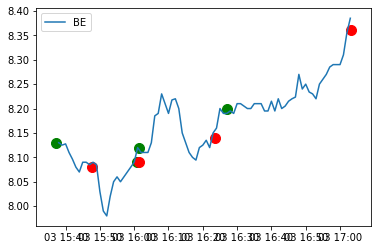

Delta = 0.13000000000000078


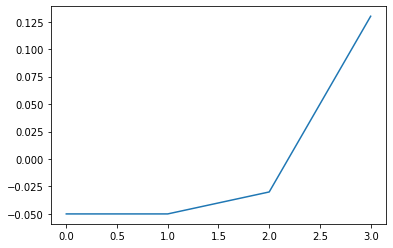

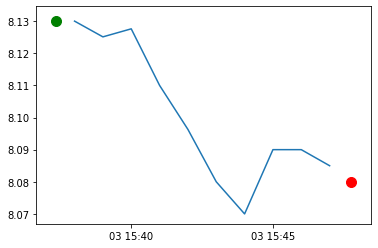

buy time:2020-02-03T15:37:20.426081912Z sell time:2020-02-03T15:47:46.250709657Z
{'rsi': 60.74793497642458, 'macd1': [0.0058020301882137915, 0.005545598602491708, 0.00527351575211199, 0.006603667185549611, 0.00916599475094415], 'macd2': [0.02657699542330505, 0.026036648034716947, 0.025496269812691708, 0.025279798254063124, 0.025360078042380607], 'macd_signal': [0.006560477609093529, 0.006357501807773165, 0.00614070459664093, 0.006233297114422666, 0.006819836641726963]}
{'rsi': 46.714713217396806, 'macd': [0.0037521214331039943, 0.001747376689166913, 0.0012015057628609327, 0.0007605478233649876, -8.517425895249175e-06], 'too_close': 1, 'macd_signal': [0.005054524091202176, 0.004393094610795124, 0.003754776841208286, 0.003155931037639626, 0.002523041344932651], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.0025315587708279004}


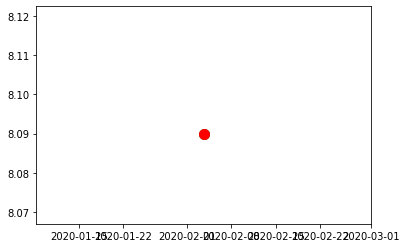

buy time:2020-02-03T16:00:48.578085155Z sell time:2020-02-03T16:01:29.400318319Z
{'rsi': 55.36713999809986, 'macd1': [-0.014638851968367561, -0.012825461760700207, -0.010460834540895192, -0.007691273789870223, -0.004636019369097966], 'macd2': [0.010292936721979729, 0.009832091006988009, 0.009552309178030072, 0.009439559387887542, 0.009480664743877654], 'macd_signal': [-0.011496275386209703, -0.011762112661107804, -0.011501857037065282, -0.01073974038762627, -0.00951899618392061]}
{'rsi': 55.36713999809986, 'macd': [-0.009558902485522935, -0.008293872861592888, -0.006680942338251228, -0.004817867354629968, -0.002784070388761606], 'too_close': 0, 'macd_signal': [-0.007820740835938285, -0.007915367241069206, -0.00766848226050561, -0.007098359279330482, -0.006235501501216706], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': 0.0034514311124551004}


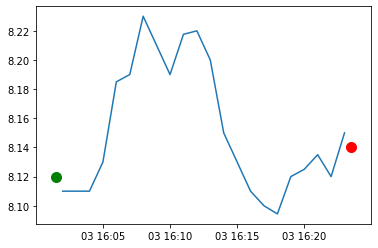

buy time:2020-02-03T16:01:31.619832807Z sell time:2020-02-03T16:23:29.977253131Z
{'rsi': 61.23823400737807, 'macd1': [-0.012825461760700207, -0.010460834540895192, -0.007691273789870223, -0.004636019369097966, 0.00020369300466072104], 'macd2': [0.009832091006988009, 0.009552309178030072, 0.009439559387887542, 0.009480664743877654, 0.009983128064613211], 'macd_signal': [-0.011762112661107804, -0.011501857037065282, -0.01073974038762627, -0.00951899618392061, -0.007574458346204344]}
{'rsi': 47.915631885702616, 'macd': [0.0029064775764453543, 0.0019765260633608506, 0.0017456998705238647, 0.0007639430985655338, -5.939068365989897e-07], 'too_close': 0, 'macd_signal': [0.01090601455965167, 0.009120116860393507, 0.007645233462419579, 0.006268975389648769, 0.005015061530351696], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.005015655437188295}


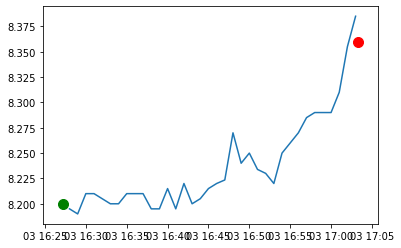

buy time:2020-02-03T16:27:10.42347348Z sell time:2020-02-03T17:03:14.17199937Z
{'rsi': 61.67569146410737, 'macd1': [0.00403635179995554, 0.005682948730845183, 0.010099137793726953, 0.01264630429263569, 0.015295550930897406], 'macd2': [0.015205842312244755, 0.01531029550586993, 0.01602165320939264, 0.016490564630013083, 0.017055539808071174], 'macd_signal': [0.009765295625777761, 0.008948826246791245, 0.009178888556178388, 0.009872371703469848, 0.01095700754895536]}
{'rsi': 78.01677826239482, 'macd': [0.013563152321932392, 0.014319490432120219, 0.014722877395485057, 0.015884959738425408, 0.019181582866192315], 'too_close': 0, 'macd_signal': [0.011033491147844006, 0.011690691004699248, 0.01229712828285641, 0.013014694573970208, 0.01424807223241463], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': 0.004933510633777685}
DUST analysis


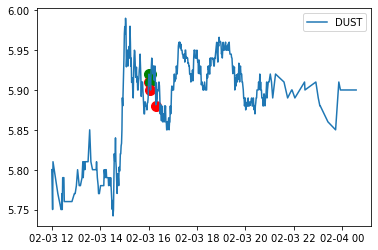

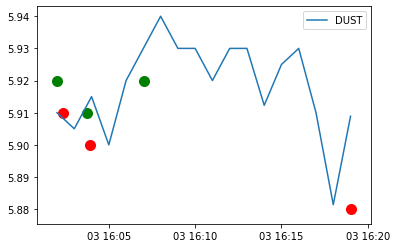

Delta = -0.05999999999999961


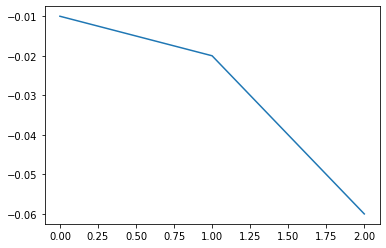

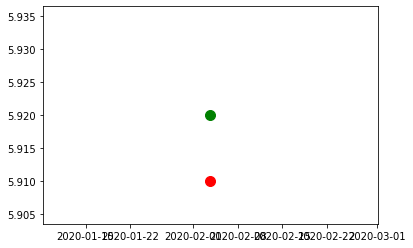

buy time:2020-02-03T16:01:58.578658844Z sell time:2020-02-03T16:02:21.340735733Z
{'rsi': 60.293693203562526, 'macd1': [-0.009961086893253146, -0.009293165062706166, -0.008201281405580296, -0.005656913510048156, -0.0028012758310964614], 'macd2': [0.00980183135350643, 0.009284323413448092, 0.008886113471933577, 0.008825407542580876, 0.008915377165287452], 'macd_signal': [-0.00916124361993382, -0.00918762790848829, -0.00899035860790669, -0.008323669588334984, -0.007219190836887279]}
{'rsi': 55.274812305568844, 'macd': [-0.005858477304051313, -0.005102515851389988, -0.003408227500596439, -0.0015242595973736783, -0.0005559176000913268], 'too_close': 0, 'macd_signal': [-0.006033860934008067, -0.005847591917484451, -0.005359719034106849, -0.004592627146760215, -0.0037852852374264377], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': 0.003229367637335111}


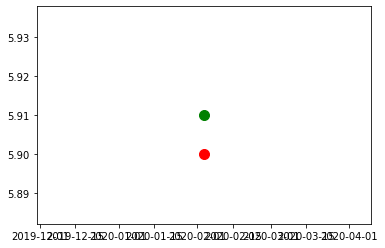

buy time:2020-02-03T16:03:45.027946318Z sell time:2020-02-03T16:03:55.122429598Z
{'rsi': 58.92050437514105, 'macd1': [-0.008201281405580296, -0.005656913510048156, -0.0028012758310964614, -0.001329750289683851, 0.0006280517759780224], 'macd2': [0.008886113471933577, 0.008825407542580876, 0.008915377165287452, 0.008823957170559282, 0.008884071830074447], 'macd_signal': [-0.00899035860790669, -0.008323669588334984, -0.007219190836887279, -0.0060413027274465935, -0.00470743182676167]}
{'rsi': 50.979058802394285, 'macd': [-0.005102515851389988, -0.003408227500596439, -0.0015242595973736783, -0.0005559176000913268, -0.0002824573736361913], 'too_close': 0, 'macd_signal': [-0.005847591917484451, -0.005359719034106849, -0.004592627146760215, -0.0037852852374264377, -0.0030847196646683886], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': 0.0028022622910321973}


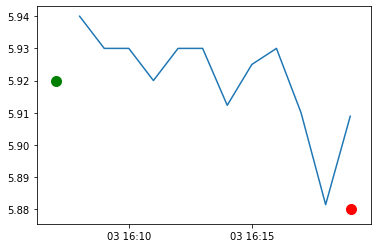

buy time:2020-02-03T16:07:02.964479367Z sell time:2020-02-03T16:19:02.467788157Z
{'rsi': 58.994179542739644, 'macd1': [-0.0005605522126259643, 0.000846204710568621, 0.0007421401380227621, 0.002247592223486805, 0.0037923470799219317], 'macd2': [0.008645767151945982, 0.008627934964247075, 0.008357825566505106, 0.008415821157680803, 0.00853408767933761], 'macd_signal': [-0.004945152624482468, -0.0037868811574722503, -0.002881076898373248, -0.0018553430740012374, -0.0007258050432166036]}
{'rsi': 41.60902420096783, 'macd': [0.0043712890661158355, 0.00449014533025327, 0.0034854859863315824, 0.0011716542120243645, -0.00037122319928073466], 'too_close': 1, 'macd_signal': [0.004008590507149536, 0.004104901471770283, 0.003981018374682543, 0.0034191455421509072, 0.0026610717938645788], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.0030322949931453134}
QTT analysis


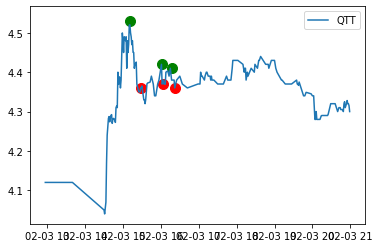

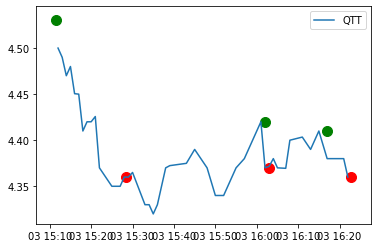

Delta = -0.2699999999999996


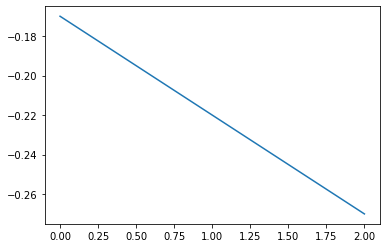

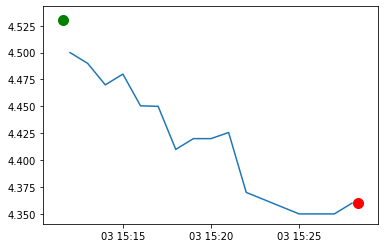

buy time:2020-02-03T15:11:34.960028378Z sell time:2020-02-03T15:28:19.08866323Z
{'rsi': 66.34743093110102, 'macd1': [0.059840173613139314, 0.05620369059481245, 0.054309537909856154, 0.05619520702665959, 0.058228763092227354], 'macd2': [0.03854066220939423, 0.03909469461647319, 0.03986176770332772, 0.04130342628071215, 0.04280364326649355], 'macd_signal': [0.06128842263368049, 0.06027147622590688, 0.05907908856269674, 0.05850231225548931, 0.05844760242283692]}
{'rsi': 40.93908911467442, 'macd': [0.00640464896348103, 0.0019248817950376917, -0.002629805372516003, -0.006144758939798045, -0.008284401213786374], 'too_close': 0, 'macd_signal': [0.016564812322557486, 0.013636826217053527, 0.010383499899139621, 0.007077848131352088, 0.004005398262324395], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.01228979947611077}


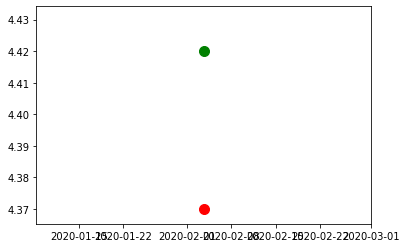

buy time:2020-02-03T16:01:59.913927578Z sell time:2020-02-03T16:02:52.755938647Z
{'rsi': 59.48386954996748, 'macd1': [-0.013271209875036938, -0.011511423942991428, -0.009203769164972009, -0.005695449676039743, -0.001286419310909892], 'macd2': [0.015594337485100418, 0.015051909505872985, 0.014688721013979666, 0.014650955478631822, 0.014912649873374484], 'macd_signal': [-0.013425064884211, -0.013042336695967086, -0.012274623189768071, -0.010958788487022406, -0.009024314651799903]}
{'rsi': 48.29339628387637, 'macd': [-0.0076067484120487805, -0.006011423959257023, -0.003651282516051957, -0.000725830969190433, -0.0010342345564513522], 'too_close': 0, 'macd_signal': [-0.009197437698190905, -0.008560234950404129, -0.007578444463533694, -0.006207921764665042, -0.005173184323022304], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': 0.004138949766570952}


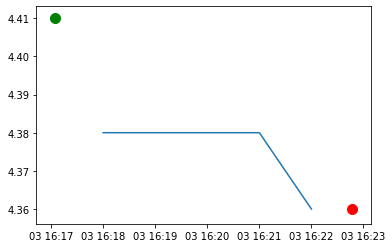

buy time:2020-02-03T16:17:04.478853306Z sell time:2020-02-03T16:22:46.338619654Z
{'rsi': 56.57071216964727, 'macd1': [-0.0022929634159538637, -9.102673111538451e-05, 0.0019063997510926356, 0.002380663806940575, 0.004320549733238366], 'macd2': [0.012373485264049577, 0.012366728081712353, 0.012395110653129926, 0.012187085005077591, 0.01229607526649712], 'macd_signal': [-0.004289281343496296, -0.003449630421020114, -0.0023784243865975644, -0.0014266067478899366, -0.00027717545166427624]}
{'rsi': 44.26001798354038, 'macd': [0.002379390089702227, 0.0018612769985919542, 0.0014333800834593902, 0.00108133859006454, -0.0002459838540103121], 'too_close': 1, 'macd_signal': [0.0004348875398803606, 0.0007201654316226793, 0.0008628083619900215, 0.0009065144076049252, 0.0006760147552818777], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.0009219986092921898}
PBI analysis


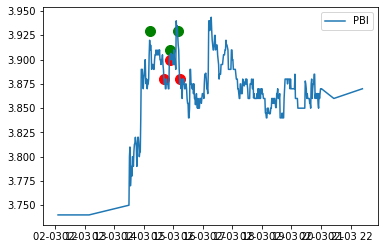

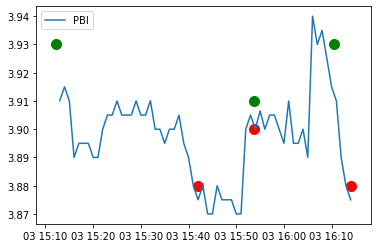

Delta = -0.11000000000000076


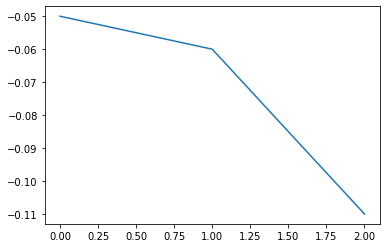

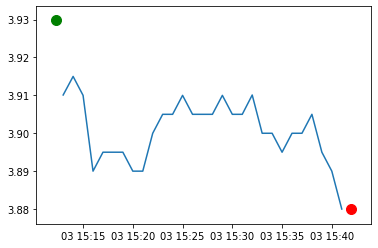

buy time:2020-02-03T15:12:18.234844671Z sell time:2020-02-03T15:41:57.298709966Z
{'rsi': 72.67963701293624, 'macd1': [0.021723696361955813, 0.020296865448919732, 0.01934653507034234, 0.020375802892592443, 0.022944308418371584], 'macd2': [0.01891695629145662, 0.01897918376559593, 0.019086048492878316, 0.019553682056854704, 0.02035248657603983], 'macd_signal': [0.024260828587796886, 0.023468035960021456, 0.022643735782085634, 0.022190149204186996, 0.022340981047023915]}
{'rsi': 39.93955953462487, 'macd': [0.002233613697830261, 0.0022200257829871894, 0.0016611257742398244, 0.0009443059521738739, -0.00014599918128244127], 'too_close': 1, 'macd_signal': [0.003881733800088051, 0.0035493921966678788, 0.003171738912182268, 0.0027262523201805893, 0.002151802019887983], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.0022978012011704244}


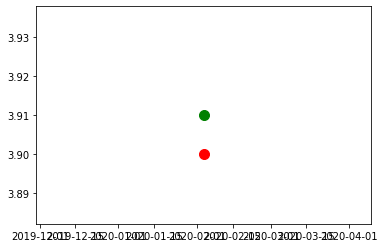

buy time:2020-02-03T15:53:39.575555865Z sell time:2020-02-03T15:53:42.301914042Z
{'rsi': 63.51142072584348, 'macd1': [-0.005266991705772828, -0.005722937804327977, -0.006014941866679724, -0.0037820112389872484, -0.001191743525108535], 'macd2': [0.010823671736065688, 0.01026460967691012, 0.009733837890894659, 0.009709751033163627, 0.009831996989272618], 'macd_signal': [-0.002801201573627823, -0.003385548819767854, -0.003911427429150228, -0.003885544191117632, -0.0033467840579158126]}
{'rsi': 61.439101654580156, 'macd': [-0.0038350662902737476, -0.004073575270717278, -0.004206522849365513, -0.0026970466398785753, -0.0012260645722279584], 'too_close': 0, 'macd_signal': [-0.002461467714313085, -0.0027838892255939236, -0.0030684159503482416, -0.0029941420882543084, -0.0026405265850490385], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': 0.0014144620128210801}


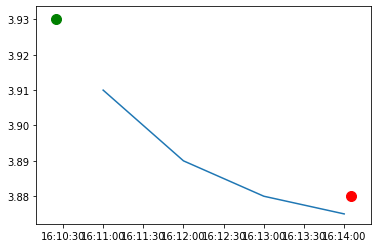

buy time:2020-02-03T16:10:24.521067309Z sell time:2020-02-03T16:14:05.253133078Z
{'rsi': 60.302695072236354, 'macd1': [0.005625754794848614, 0.0073494581446222895, 0.009015043867155903, 0.00941953360569725, 0.010027956807053595], 'macd2': [0.008938723300694562, 0.009234326835441564, 0.00957149054040407, 0.00970644764674411, 0.009895056407680514], 'macd_signal': [0.003212034486318885, 0.004039519217979566, 0.005034624147814833, 0.005911606039391316, 0.006734876192923772]}
{'rsi': 41.397171097613075, 'macd': [0.005504781246602253, 0.004851328549861478, 0.003240179324480952, 0.0014231775991908613, -1.1150726998643279e-05], 'too_close': 1, 'macd_signal': [0.004043856073646833, 0.004205350568889762, 0.004012316320007999, 0.0034944885758445717, 0.0027933607152759287], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.002804511442274572}
SPPI analysis


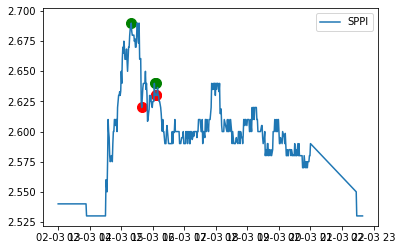

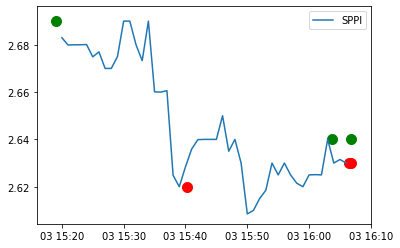

Delta = -0.0900000000000003


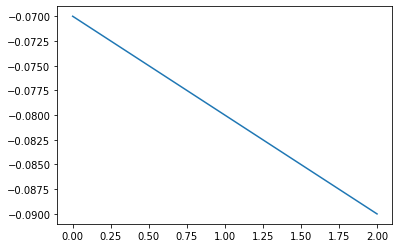

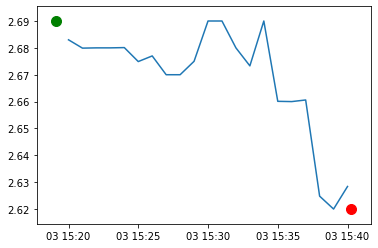

buy time:2020-02-03T15:19:07.799119652Z sell time:2020-02-03T15:40:16.230167959Z
{'rsi': 71.3993517236091, 'macd1': [0.016081186619894883, 0.01645815664353023, 0.017012669834201688, 0.017253240911403456, 0.017643964793411904], 'macd2': [0.016250699470777175, 0.016532592288036607, 0.01685506530017644, 0.017124793464804, 0.017425531302848185], 'macd_signal': [0.017964351360999352, 0.01766311241750553, 0.01753302390084476, 0.0174770673029565, 0.01751044680104758]}
{'rsi': 34.041474562155585, 'macd': [0.0016395965516591282, 0.0007671756189497891, -0.001782336479511315, -0.0039951727058507025, -0.0054078350548705245], 'too_close': 1, 'macd_signal': [0.004026413017728206, 0.0033745655379725224, 0.002343185134475755, 0.0010755135664104634, -0.00022115615784573444], 'data.close <= stop_prices': 1, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.00518667889702479}


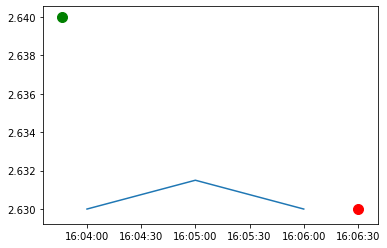

buy time:2020-02-03T16:03:45.947788807Z sell time:2020-02-03T16:06:30.244613857Z
{'rsi': 54.08386335349643, 'macd1': [-0.008649471047703639, -0.008064334783969507, -0.007506016232223356, -0.006991025728921407, -0.005311292135406376], 'macd2': [0.0018569216922097453, 0.001584912520557591, 0.001333719895985741, 0.0010988821875792532, 0.001120970513931674], 'macd_signal': [-0.009248756914542602, -0.009011872488427983, -0.008710701237187058, -0.008366766135533927, -0.007755671335508417]}
{'rsi': 48.143893047089655, 'macd': [-0.00410275357731571, -0.0029940083201447365, -0.0026106482714385315, -0.002200099554635404, -0.001929540820053699], 'too_close': 0, 'macd_signal': [-0.0051404693795988315, -0.004711177167708013, -0.0042910713884541166, -0.003872877021690374, -0.003484209781363039], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': 0.0015546689613093402}


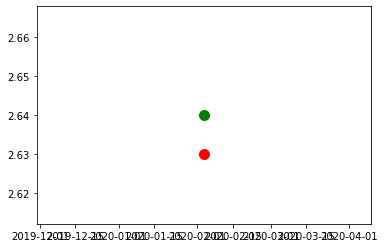

buy time:2020-02-03T16:06:45.670611432Z sell time:2020-02-03T16:06:48.318217962Z
{'rsi': 53.94705640255037, 'macd1': [-0.006991025728921407, -0.005311292135406376, -0.004732454794214913, -0.004105360526395874, -0.0028891999401965407], 'macd2': [0.0010988821875792532, 0.001120970513931674, 0.0009795636194418478, 0.0008718884820173578, 0.0009073750693255889], 'macd_signal': [-0.008366766135533927, -0.007755671335508417, -0.007151028027249716, -0.006541894527078948, -0.005811355609702466]}
{'rsi': 48.143893047089655, 'macd': [-0.00410275357731571, -0.0029940083201447365, -0.0026106482714385315, -0.002200099554635404, -0.001929540820053699], 'too_close': 0, 'macd_signal': [-0.0051404693795988315, -0.004711177167708013, -0.0042910713884541166, -0.003872877021690374, -0.003484209781363039], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': 0.0015546689613093402}
CLSD analysis


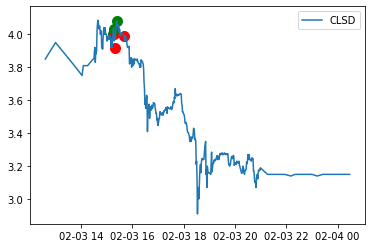

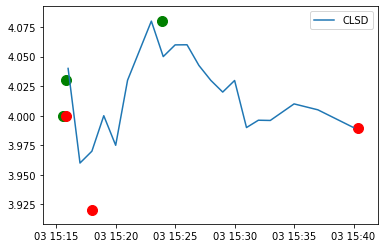

Delta = -0.20000000000000018


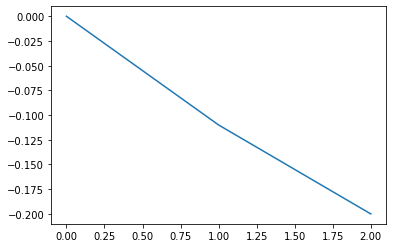

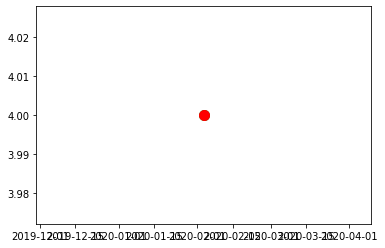

buy time:2020-02-03T15:15:32.908518788Z sell time:2020-02-03T15:15:49.356571932Z
{'rsi': 54.27486235902096, 'macd1': [-0.0010145394007827768, -0.0048978862478961105, -0.004693694903065815, -0.0028847849331494757, 0.0001607688601823476], 'macd2': [0.022358020679750013, 0.02102998668871292, 0.020414262514330428, 0.020134998869663523, 0.020165736317941274], 'macd_signal': [0.006529324555473848, 0.004243882394799857, 0.002456366935226722, 0.0013881365615514825, 0.0011426630212776556]}
{'rsi': 54.27486235902096, 'macd': [-0.0023741239771943867, -0.004785291955378579, -0.004524055419478312, -0.003222779476965254, -0.0011279829051762391], 'too_close': 0, 'macd_signal': [0.002176000476749357, 0.0007837419903237697, -0.00027781749163664684, -0.0008668098887023683, -0.0009190444919971424], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.00020893841317909671}


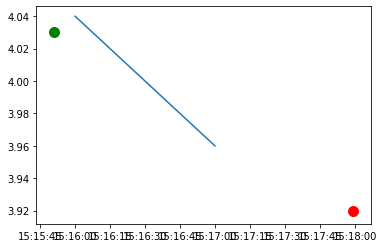

buy time:2020-02-03T15:15:50.923107308Z sell time:2020-02-03T15:17:59.405535884Z
{'rsi': 58.58916331799219, 'macd1': [-0.0010145394007827768, -0.0048978862478961105, -0.004693694903065815, -0.0028847849331494757, 0.003351652051065912], 'macd2': [0.022358020679750013, 0.02102998668871292, 0.020414262514330428, 0.020134998869663523, 0.02080548042030017], 'macd_signal': [0.006529324555473848, 0.004243882394799857, 0.002456366935226722, 0.0013881365615514825, 0.0017808396594543685]}
{'rsi': 43.29478394599109, 'macd': [-0.004524055419478312, -0.003222779476965254, 0.00043045865326529764, 0.00379102786314256, -0.00039282765985104717], 'too_close': 1, 'macd_signal': [-0.00027781749163664684, -0.0008668098887023683, -0.000607356180308835, 0.00027232062838144404, 0.0001392909707349458], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.000532118630585993}


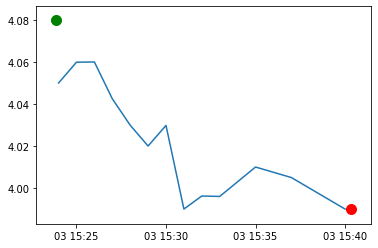

buy time:2020-02-03T15:23:52.185615324Z sell time:2020-02-03T15:40:20.267560238Z
{'rsi': 60.77081590293601, 'macd1': [0.003815967767772488, 0.005194011897220019, 0.004220183088129659, 0.007796582931855145, 0.014498359642103775], 'macd2': [0.01990142414144902, 0.01981926586663807, 0.01931213941569654, 0.019694327931778055, 0.02081413539430388], 'macd_signal': [0.0033729836811635452, 0.00373718932437484, 0.003833788077125804, 0.004626347048071672, 0.006600749566878093]}
{'rsi': 46.98783755939919, 'macd': [0.003296161495886629, 0.002560666403326195, 0.0016945576766120851, 0.0007379202573991606, -0.00027683513753817834], 'too_close': 1, 'macd_signal': [0.006731073577177436, 0.005896992142407188, 0.0050565052492481674, 0.004192788250878366, 0.0032988635731950574], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.0035756987107332357}
AMRS analysis


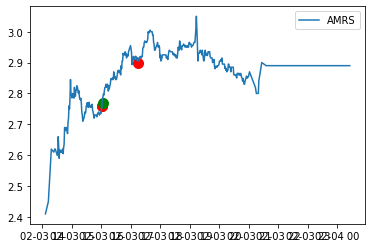

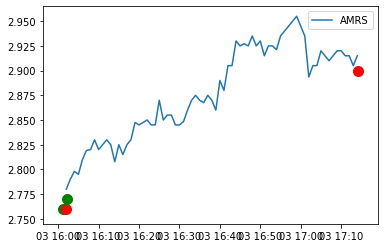

Delta = 0.1299999999999999


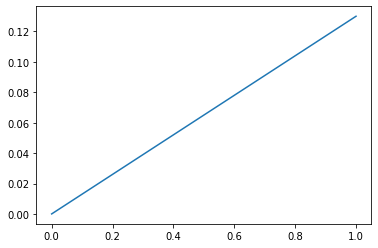

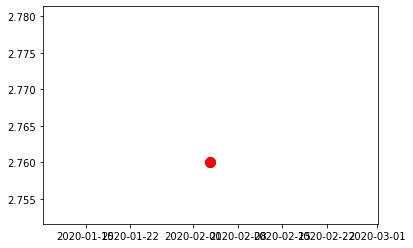

buy time:2020-02-03T16:01:10.548927625Z sell time:2020-02-03T16:02:02.214019978Z
{'rsi': 60.91214645272517, 'macd1': [-0.005143382976448674, -0.004594935873206918, -0.004248489443337444, -0.0027320600245697158, -0.0007151189127196922], 'macd2': [0.006424502157469814, 0.006149993739643644, 0.005860412034575102, 0.005824518731296191, 0.005942116265973851], 'macd_signal': [-0.005861148661560086, -0.005607906103889453, -0.005336022771779051, -0.0048152302223371845, -0.003995207960413686]}
{'rsi': 60.91214645272517, 'macd': [-0.003153733622244914, -0.0027757506630172735, -0.002533481465398335, -0.0015325771365342078, -0.0002132675668149453], 'too_close': 0, 'macd_signal': [-0.0037664182423183083, -0.0035682847264581013, -0.003361324074246148, -0.00299557468670376, -0.002439113262725997], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': 0.0022258456959110516}


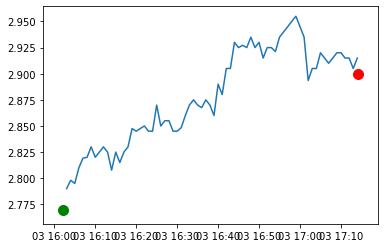

buy time:2020-02-03T16:02:06.703792262Z sell time:2020-02-03T17:14:04.362611911Z
{'rsi': 65.05656489739012, 'macd1': [-0.004594935873206918, -0.004248489443337444, -0.0027320600245697158, -0.0007151189127196922, 0.001670975906111316], 'macd2': [0.006149993739643644, 0.005860412034575102, 0.005824518731296191, 0.005942116265973851, 0.006200742200491938], 'macd_signal': [-0.005607906103889453, -0.005336022771779051, -0.0048152302223371845, -0.003995207960413686, -0.0028619711871086854]}
{'rsi': 45.93719101595878, 'macd': [0.0018095201282131157, 0.001403979401499278, 0.0010697401417028018, 0.00027592071664450657, -0.00034622326024047467], 'too_close': 1, 'macd_signal': [0.004347550184481434, 0.0037588360278850027, 0.0032210168506485626, 0.0026319976238477513, 0.002036353447030106], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.0023825767072705806}
HLIT analysis


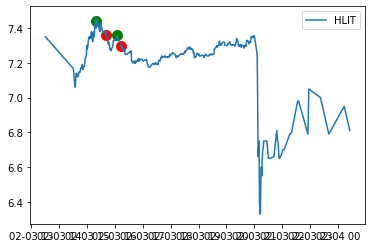

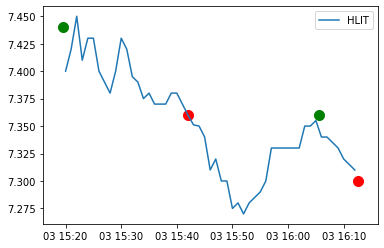

Delta = -0.14000000000000057


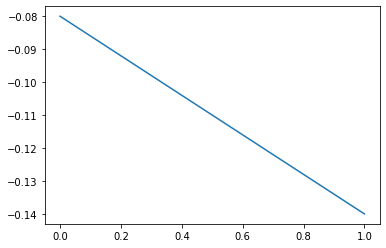

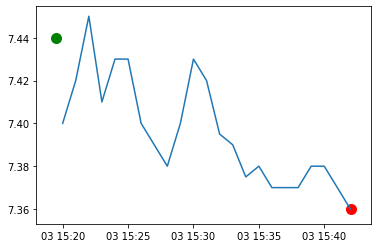

buy time:2020-02-03T15:19:31.221165371Z sell time:2020-02-03T15:42:03.281100296Z
{'rsi': 70.98778531084294, 'macd1': [0.048730410896056675, 0.04571982337895797, 0.047626402123351674, 0.049375130175246085, 0.05177797830507558], 'macd2': [0.03848867499191133, 0.03875508704579822, 0.03989782746475434, 0.041045310229312904, 0.042355256890780346], 'macd_signal': [0.05119858494271619, 0.050102832629964546, 0.04960754652864197, 0.04956106325796279, 0.05000444626738535]}
{'rsi': 45.864315697857705, 'macd': [0.002433453699735466, 0.0018879112740064485, 0.0014382949516980048, 0.0005497848959814533, -0.000669181185044998], 'too_close': 1, 'macd_signal': [0.009039167868607517, 0.007608916549687303, 0.006374792230089443, 0.005209790763267845, 0.004033996373605277], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.004703177558650275}


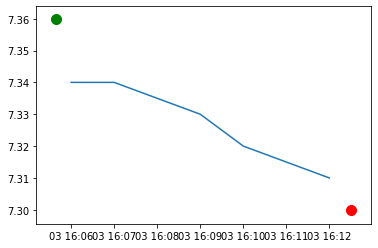

buy time:2020-02-03T16:05:38.798811224Z sell time:2020-02-03T16:12:30.768700099Z
{'rsi': 61.127163370702355, 'macd1': [-0.010548950100140786, -0.008603256267673665, -0.005385367865967439, -0.0028028585157304775, 5.0137226087265674e-05], 'macd2': [0.01226049097332016, 0.011890318843455816, 0.011850603791000225, 0.011795111287655757, 0.011885127802911732], 'macd_signal': [-0.016404521829549507, -0.014844268717174338, -0.012952488546932959, -0.010922562540692463, -0.008728022587336518]}
{'rsi': 38.53772014727411, 'macd': [0.0007859412931443543, 0.0011395911239100442, 0.0008808820164034614, 0.00014836995839395684, -0.0014633065797751144], 'too_close': 1, 'macd_signal': [-0.0042122308233272145, -0.003141866433879763, -0.002337316743823118, -0.0018401794033797029, -0.0017648048386587852], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': 0.0003014982588836709}
UBX analysis


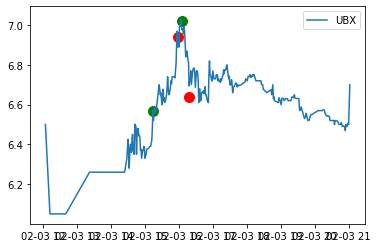

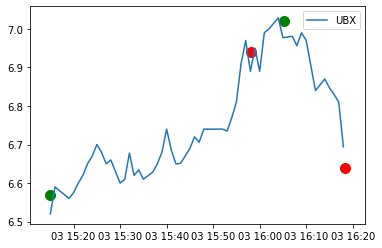

Delta = -0.009999999999999787


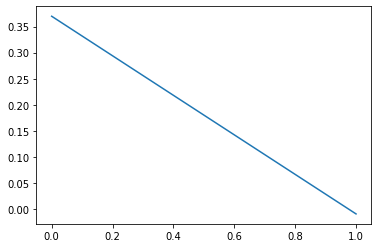

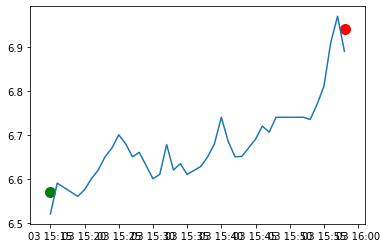

buy time:2020-02-03T15:14:58.63563527Z sell time:2020-02-03T15:58:04.014670426Z
{'rsi': 68.73755459288216, 'macd1': [0.029982046729641887, 0.028792216169765794, 0.029925058709237895, 0.035042527266268664, 0.04604746670820159], 'macd2': [0.07345595205629518, 0.07264538897767014, 0.07226326694655238, 0.07271256088442168, 0.07449223905615288], 'macd_signal': [0.046217072179775415, 0.04273210097777349, 0.04017069252406637, 0.03914505947250683, 0.04052554091964578]}
{'rsi': 78.1091884502726, 'macd': [0.025229320909646802, 0.026118847976557724, 0.02858187104198784, 0.03532472185866098, 0.04167857026309907], 'too_close': 0, 'macd_signal': [0.02577994377699085, 0.025847724616904225, 0.02639455390192095, 0.028180587493268953, 0.030880184047234978], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': 0.01079838621586409}


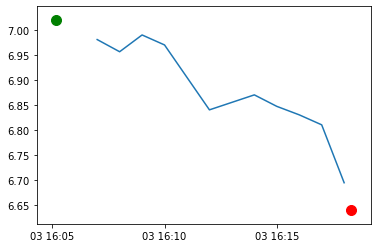

buy time:2020-02-03T16:05:09.551757225Z sell time:2020-02-03T16:18:19.274183266Z
{'rsi': 71.17097996518505, 'macd1': [0.08093921272012139, 0.0797368526536486, 0.0858633585542341, 0.09048254854980087, 0.09535989058564631], 'macd2': [0.0858441486423942, 0.0863184255407301, 0.08821608145472748, 0.08998083232729392, 0.09191956420592895], 'macd_signal': [0.06315871455665961, 0.06647434217605741, 0.07035214545169274, 0.07437822607131436, 0.07857455897418075]}
{'rsi': 33.40678309897551, 'macd': [0.03197163082994603, 0.025430213538305324, 0.019119625862502154, 0.012915016948078062, -0.0014381200884612255], 'too_close': 1, 'macd_signal': [0.044370191449627, 0.04058219586736266, 0.03628968186639056, 0.03161474888272806, 0.025004175088490205], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.02644229517695143}
BCRX analysis


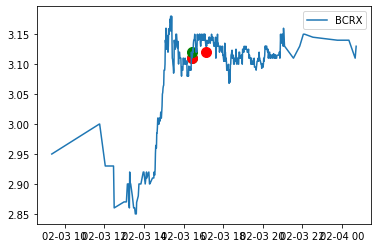

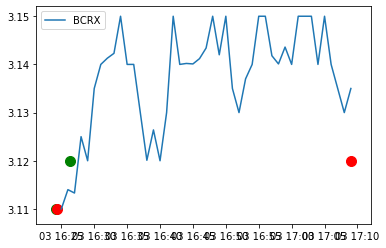

Delta = 0.0


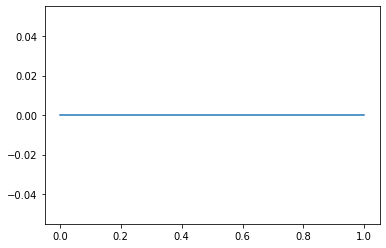

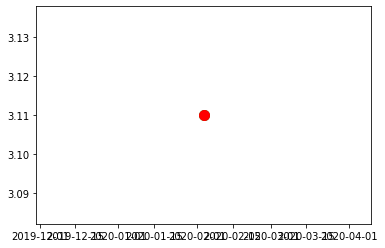

buy time:2020-02-03T16:24:15.647091174Z sell time:2020-02-03T16:24:16.777176716Z
{'rsi': 57.50235960756901, 'macd1': [-0.005391159221490582, -0.0047023218635047215, -0.004507907160085534, -0.004304215786636423, -0.002500136040639589], 'macd2': [0.004562420398821487, 0.004343265271061991, 0.004054721084712831, 0.0037827662437979193, 0.0038463811362730027], 'macd_signal': [-0.005682270997466306, -0.00548628117067399, -0.005290606368556298, -0.005093328252172323, -0.004574689809865777]}
{'rsi': 57.50235960756901, 'macd': [-0.0031719906652640795, -0.00271456420129379, -0.0025826141748068743, -0.0024462555285209575, -0.0012692714466289168], 'too_close': 0, 'macd_signal': [-0.003423711508891455, -0.0032818820473719218, -0.0031420284728589125, -0.0030028738839913216, -0.002656153396518841], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': 0.001386881949889924}


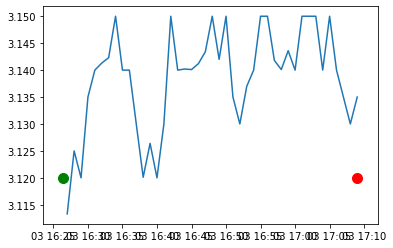

buy time:2020-02-03T16:26:21.708901791Z sell time:2020-02-03T17:09:02.280674242Z
{'rsi': 59.878053397077714, 'macd1': [-0.004507907160085534, -0.004304215786636423, -0.0017024152429185868, -0.00044228757769326776, 0.0013477530440955121], 'macd2': [0.004054721084712831, 0.0037827662437979193, 0.004006317161862505, 0.004045647587219925, 0.004235298414248412], 'macd_signal': [-0.005290606368556298, -0.005093328252172323, -0.004415145650321576, -0.003620574035795914, -0.0026269086198176285]}
{'rsi': 41.503012729440876, 'macd': [0.002358909972840273, 0.0018953469420828206, 0.0012497738409460446, 0.00047075877719127135, -0.00040211995790651045], 'too_close': 1, 'macd_signal': [0.00263789368596375, 0.002489384337187564, 0.0022414622379392604, 0.0018873215457896626, 0.001429433245050428], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.0018315532029569385}
SAVA analysis


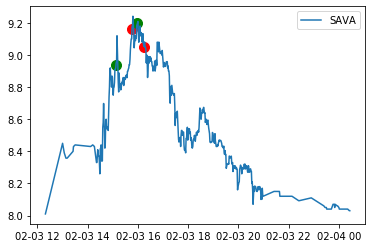

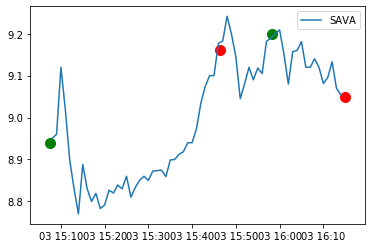

Delta = 0.07000000000000206


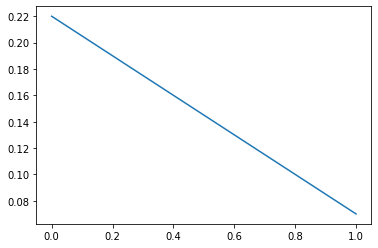

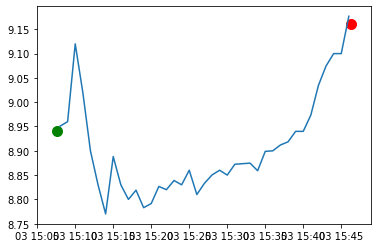

buy time:2020-02-03T15:07:32.429730986Z sell time:2020-02-03T15:46:19.243832294Z
{'rsi': 66.6413041442369, 'macd1': [0.10020370280208901, 0.09657097213851706, 0.09900605811847107, 0.09978561484785509, 0.10165238305637025], 'macd2': [0.1069816005714781, 0.10739319821545834, 0.10887960900551619, 0.11007301675917525, 0.11147475173483912], 'macd_signal': [0.11797038453902506, 0.11369050205892346, 0.11075361327083298, 0.1085600135862374, 0.10717848748026397]}
{'rsi': 78.47246846146219, 'macd': [0.023852338226522107, 0.029503021334885915, 0.034847670233157046, 0.038559764566445054, 0.04354893203957211], 'too_close': 0, 'macd_signal': [0.015058814488578974, 0.01794765585784036, 0.0213276587329037, 0.02477407989961197, 0.028529050327603996], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': 0.015019881711968112}


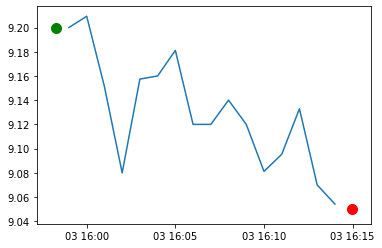

buy time:2020-02-03T15:58:16.634415321Z sell time:2020-02-03T16:14:56.1817359Z
{'rsi': 64.76287486044201, 'macd1': [0.0636353593868435, 0.06075361336212737, 0.05674251760644289, 0.05907977856587543, 0.06169752115727256], 'macd2': [0.08338802636126097, 0.08298095536401462, 0.08226100566944439, 0.08269537261471172, 0.08325542733306612], 'macd_signal': [0.07104832015773577, 0.06898937879861408, 0.06654000656017985, 0.06504796096131896, 0.06437787300050968]}
{'rsi': 44.250752188645166, 'macd': [0.009718467302368694, 0.007085692832676571, 0.0068954050272989065, 0.003390045633143046, -0.00042439085104639673], 'too_close': 1, 'macd_signal': [0.019703273107943762, 0.017179757052890324, 0.015122886647772041, 0.012776318444846241, 0.010136176585667714], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.010560567436714111}
MTEM analysis


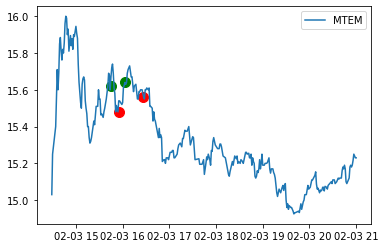

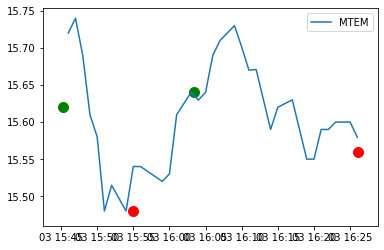

Delta = -0.21999999999999886


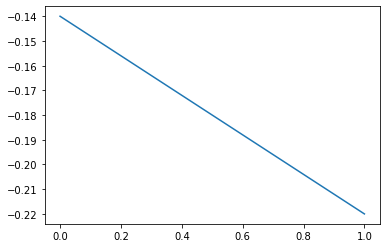

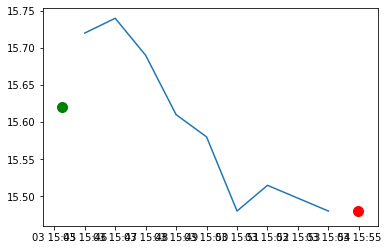

buy time:2020-02-03T15:45:15.51750009Z sell time:2020-02-03T15:54:58.538940411Z
{'rsi': 55.38420202978321, 'macd1': [-0.009238462751920196, 0.005379968434947813, 0.015974124282951863, 0.017710581152094562, 0.020464664668921273], 'macd2': [0.03045915899399887, 0.032074069922988, 0.033348605615875826, 0.03318839458303735, 0.033307787160049784], 'macd_signal': [-0.029998712527103004, -0.02292297633469284, -0.0151435562111639, -0.008572728738512206, -0.0027652500570255105]}
{'rsi': 42.90189170030913, 'macd': [0.02552720037456524, 0.020753158246854753, 0.011568798689587823, 0.006064508142502589, -0.0001059066752588933], 'too_close': 1, 'macd_signal': [0.01570291374462865, 0.01671296264507387, 0.01568412985397666, 0.013760205511681847, 0.010986983074293698], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.011092889749552592}


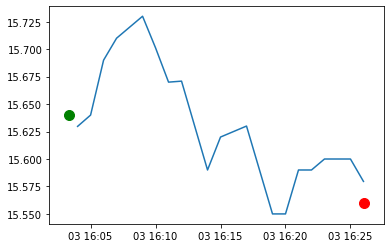

buy time:2020-02-03T16:03:21.44187648Z sell time:2020-02-03T16:26:02.474441974Z
{'rsi': 56.108001264391795, 'macd1': [-0.00447430016083139, -0.00755051050453126, -0.009076880312223423, -0.0037875474799342612, 0.0027928420323153347], 'macd2': [0.026539792913135685, 0.025003074930889824, 0.02370919233317892, 0.023760347620399358, 0.024249218842076203], 'macd_signal': [0.009095811325801862, 0.0057665469597352375, 0.0027978615053435053, 0.001480779708287952, 0.0017431921730934284]}
{'rsi': 44.39953095354522, 'macd': [-0.001931659206309888, -0.002628910305276122, -0.0026186006381685445, -0.0025765593308353374, -0.004577870528617467], 'too_close': 1, 'macd_signal': [0.006420150728460777, 0.004610338521713398, 0.003164550689737009, 0.00201632868562254, 0.0006974888427745385], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.005275359371392006}
HIMX analysis


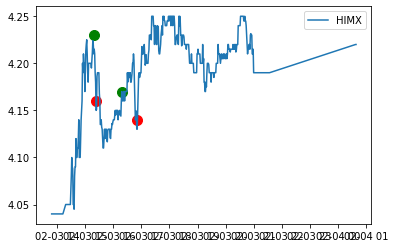

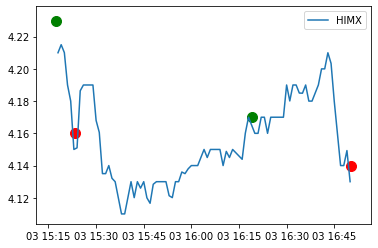

Delta = -0.10000000000000053


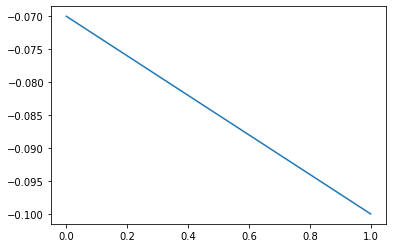

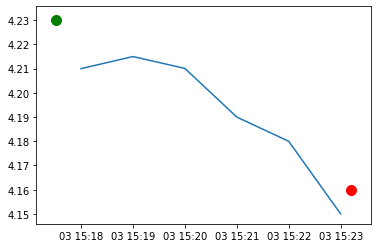

buy time:2020-02-03T15:17:31.025416782Z sell time:2020-02-03T15:23:12.285649665Z
{'rsi': 66.92691166044739, 'macd1': [0.020327980116483957, 0.01943954695716066, 0.019160124431112813, 0.01972798285735955, 0.020426698343936067], 'macd2': [0.031043263556383316, 0.030861760633853486, 0.03077336188644253, 0.03084433391149677, 0.030956260858319595], 'macd_signal': [0.025480796921135813, 0.02427254692834078, 0.02325006242889519, 0.022545646514588062, 0.022121856880457664]}
{'rsi': 40.294234583524194, 'macd': [0.009589430635918994, 0.008898035893174061, 0.007199571991123754, 0.005263112171459916, 0.0026468692967682728], 'too_close': 1, 'macd_signal': [0.011267883227328733, 0.010793913760497799, 0.01007504540662299, 0.009112658759590376, 0.007819500867025955], 'data.close <= stop_prices': 1, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.005172631570257682}


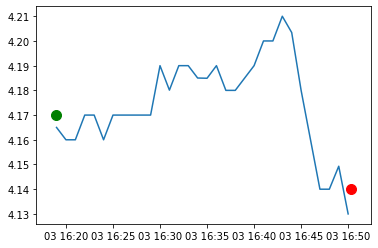

buy time:2020-02-03T16:18:59.504164821Z sell time:2020-02-03T16:50:19.231187604Z
{'rsi': 66.28212851902653, 'macd1': [0.002665813434304276, 0.00289483255954881, 0.0025546642666824937, 0.0035513453561275554, 0.005081493271149817], 'macd2': [0.0023089197296766173, 0.0023556232468626703, 0.0022972635107789685, 0.0024989928963163877, 0.0028389302591858012], 'macd_signal': [0.00172931159279844, 0.001962415786148514, 0.00208086548225531, 0.0023749614570297587, 0.0029162678198537705]}
{'rsi': 36.60356708275882, 'macd': [0.005610045489155446, 0.0025073108615885076, 5.703308865978585e-05, -0.0013698980732161914, -0.002947118484116551], 'too_close': 1, 'macd_signal': [0.005967007603689787, 0.005275068255269531, 0.0042314612219475824, 0.003111189362914828, 0.001899527793508552], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.004846646277625103}
BBAR analysis


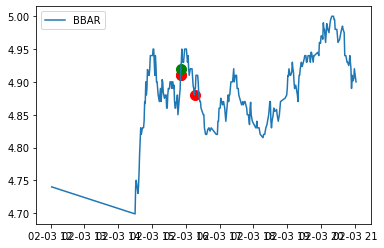

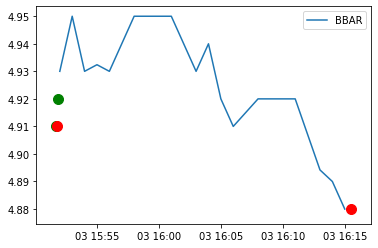

Delta = -0.040000000000000036


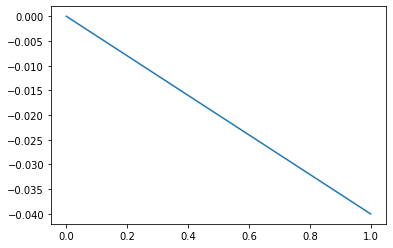

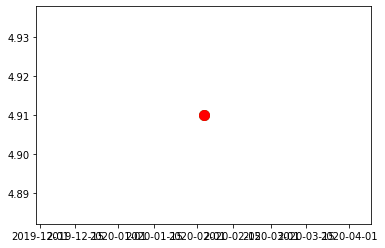

buy time:2020-02-03T15:51:43.249464735Z sell time:2020-02-03T15:51:44.325887238Z
{'rsi': 60.180570352226816, 'macd1': [-0.0053634411082654765, -0.006067298809203869, -0.005751890468808973, -0.0038437854674304717, -0.0007095859880896782], 'macd2': [0.013659016450693784, 0.012962118673200962, 0.012460155354247604, 0.012298276818329512, 0.012449546063264094], 'macd_signal': [-0.001929065483468044, -0.0027567121486152093, -0.003355747812653962, -0.003453355343609264, -0.0029046014725053466]}
{'rsi': 60.180570352226816, 'macd': [-0.0038415670383642464, -0.00424766839860613, -0.003989465972838779, -0.002697496992074555, -0.0006167744487246551], 'too_close': 0, 'macd_signal': [-0.0018030482986252435, -0.0022919723186214207, -0.0026314710494648925, -0.002644676237986825, -0.002239095880134391], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': 0.001622321431409736}


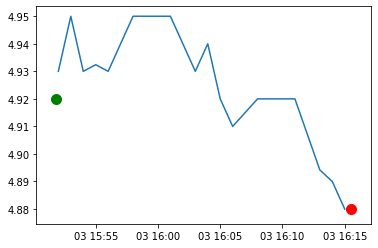

buy time:2020-02-03T15:51:50.468160301Z sell time:2020-02-03T16:15:31.299395434Z
{'rsi': 62.57517524130667, 'macd1': [-0.0053634411082654765, -0.006067298809203869, -0.005751890468808973, -0.0038437854674304717, 8.813480963176801e-05], 'macd2': [0.013659016450693784, 0.012962118673200962, 0.012460155354247604, 0.012298276818329512, 0.012609482088853596], 'macd_signal': [-0.001929065483468044, -0.0027567121486152093, -0.003355747812653962, -0.003453355343609264, -0.0027450573129610576]}
{'rsi': 39.5007970724894, 'macd': [0.005602871452452085, 0.004941124497790383, 0.003021047331848159, 0.0012674671073238386, -0.0006349001729200054], 'too_close': 1, 'macd_signal': [0.007334302508548205, 0.006855666906396641, 0.006088742991486944, 0.005124487814654323, 0.003972610217139457], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.004607510390059463}
MGI analysis


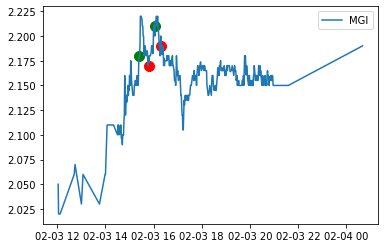

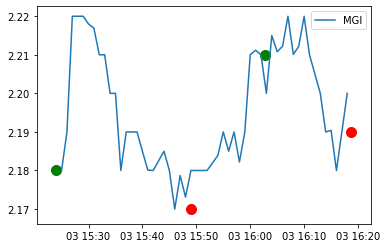

Delta = -0.03000000000000025


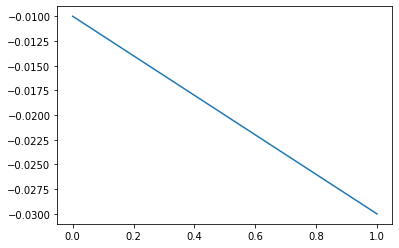

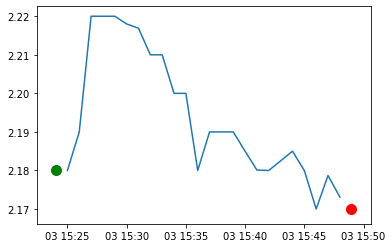

buy time:2020-02-03T15:24:03.530495219Z sell time:2020-02-03T15:48:58.582904238Z
{'rsi': 65.63903039686984, 'macd1': [0.00685336467346831, 0.006149101223031028, 0.005910158619719219, 0.007266996652797175, 0.008646092016003415], 'macd2': [0.009478331143712548, 0.009372539850374562, 0.009336987701085153, 0.00961241615117725, 0.009930413431888052], 'macd_signal': [0.00837458727488605, 0.007929490064515047, 0.007525623775555881, 0.00747389835100414, 0.007708337084003996]}
{'rsi': 45.06139830782627, 'macd': [0.0023416497317803042, 0.0016597997367551187, 0.0005874516921018369, 0.00019617462234533534, -0.000402173414118856], 'too_close': 0, 'macd_signal': [0.005380816610766492, 0.004636613235964217, 0.003826780927191741, 0.00310065966622246, 0.0024000930501541966], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.0028022664642730526}


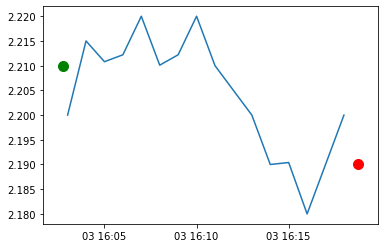

buy time:2020-02-03T16:02:44.026061969Z sell time:2020-02-03T16:18:45.211426508Z
{'rsi': 68.19312377653823, 'macd1': [0.0012108588656087882, 0.0015979335216997903, 0.00347842866796233, 0.005007837358989242, 0.006843039753850366], 'macd2': [0.009517681957147861, 0.009402915717719118, 0.009602160507884872, 0.009789307097304523, 0.01008497565942612], 'macd_signal': [0.0016420028688298055, 0.0016331889994038024, 0.0020022369331155077, 0.0026033570182902544, 0.003451293565402277]}
{'rsi': 45.915381425018836, 'macd': [0.003470231847910288, 0.0022851166732387185, 0.0013527526842316284, 6.840733326196613e-05, -0.0004137891393538595], 'too_close': 0, 'macd_signal': [0.004234502313168036, 0.0038446251851821725, 0.0033462506849920638, 0.002690682014646044, 0.0020697877838460636], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.002483576923199923}
VNTR analysis


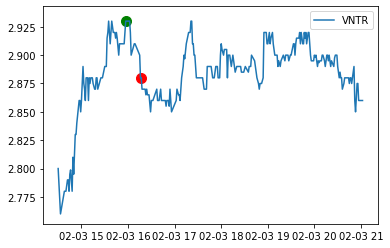

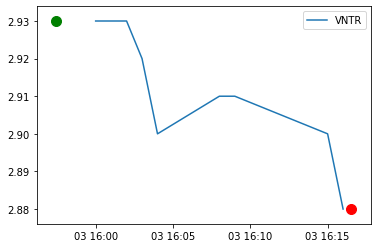

Delta = -0.050000000000000266


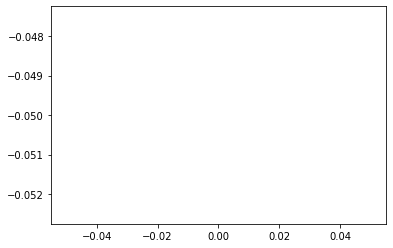

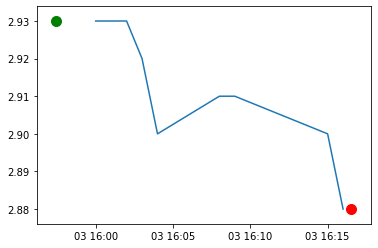

buy time:2020-02-03T15:57:25.603853873Z sell time:2020-02-03T16:16:32.184965961Z
{'rsi': 65.53606232161587, 'macd1': [0.010859652629038319, 0.010065698165930836, 0.009328945259896138, 0.009443125230838678, 0.010222689308006405], 'macd2': [0.019187873476990358, 0.018968845577428173, 0.018736994886023872, 0.018653653654330693, 0.018707079168627683], 'macd_signal': [0.014122003293790163, 0.013310742268218299, 0.012514382866553866, 0.011900131339410829, 0.011564642933129945]}
{'rsi': 36.78616401969043, 'macd': [0.003974585767912764, 0.003250786452483112, 0.0026445689800382866, 0.001618366157613238, -0.0002412511865830247], 'too_close': 1, 'macd_signal': [0.005558791266474115, 0.005097190303675914, 0.0046066660389483885, 0.004009006062681358, 0.003158954612828482], 'data.close <= stop_prices': 1, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.0034002057994115065}
PAM analysis


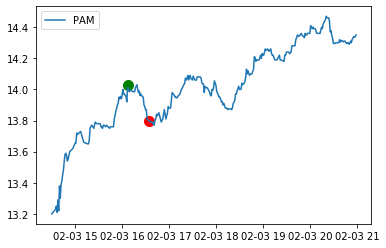

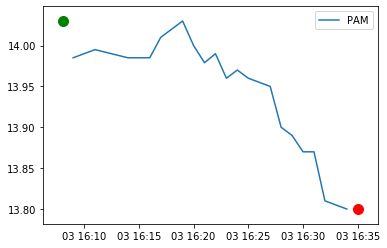

Delta = -0.22999999999999865


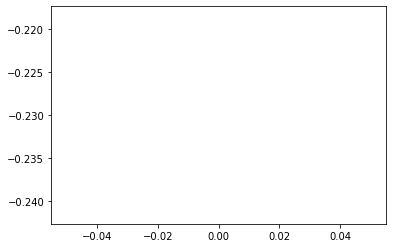

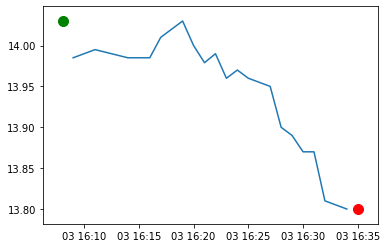

buy time:2020-02-03T16:08:01.817380718Z sell time:2020-02-03T16:34:59.485488025Z
{'rsi': 72.84081784693296, 'macd1': [0.06972920945016625, 0.06687424758795757, 0.06108333162653601, 0.06302967004278237, 0.06622945461342766], 'macd2': [0.08020069384760298, 0.08016181679045076, 0.07943806494092343, 0.0800845642349941, 0.08103108827286576], 'macd_signal': [0.06413373233773503, 0.06468183538777954, 0.06396213463553083, 0.06377564171698114, 0.06426640429627044]}
{'rsi': 27.16794122161757, 'macd': [0.00012680240776141716, -0.004252771740400618, -0.00761019611896252, -0.01324442036045248, -0.01798220002446449], 'too_close': 1, 'macd_signal': [0.012131052757953072, 0.008854287858282333, 0.005561391062833362, 0.0018002287781761937, -0.0021562569823519433], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.015825943042112545}
ATRA analysis


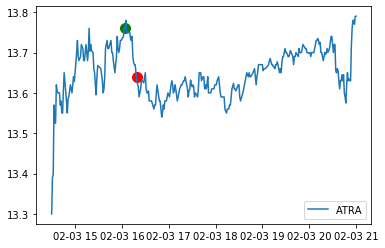

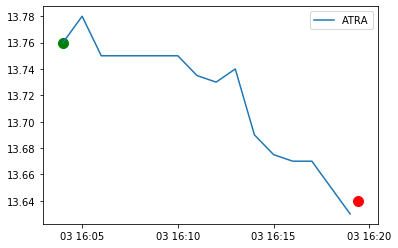

Delta = -0.11999999999999922


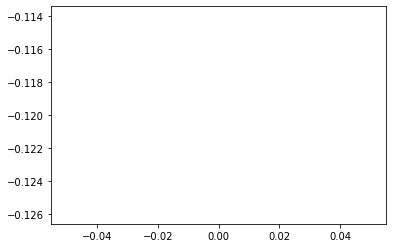

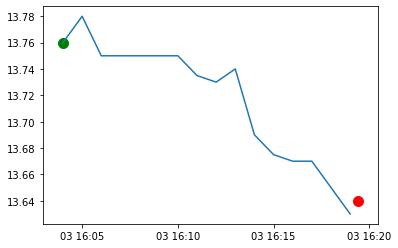

buy time:2020-02-03T16:03:59.265766149Z sell time:2020-02-03T16:19:23.428539223Z
{'rsi': 61.03099843022024, 'macd1': [0.013695872006636023, 0.015244067638844783, 0.016283319856229994, 0.017709704700550333, 0.020220864282846307], 'macd2': [0.037095006143882614, 0.03693456180974586, 0.03672787621994722, 0.036638913786116944, 0.036818338729984745], 'macd_signal': [0.012958730740685195, 0.013415798120317114, 0.01398930246749969, 0.014733382914109819, 0.015830879187857118]}
{'rsi': 34.86293772794028, 'macd': [0.00562165001690218, 0.0021792194332928005, -0.0007912358193014057, -0.0030956004860076547, -0.006409448271934792], 'too_close': 1, 'macd_signal': [0.009969846016070453, 0.008411720699514923, 0.006571129395751657, 0.004637783419399795, 0.002428337081132877], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.00883778535306767}
RRC analysis


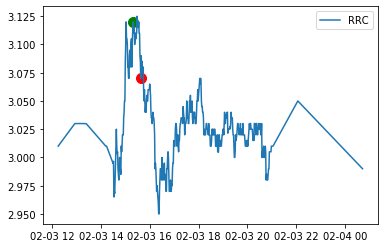

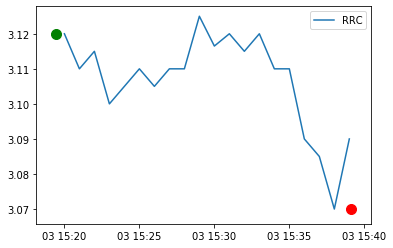

Delta = -0.050000000000000266


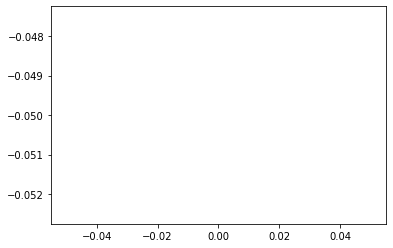

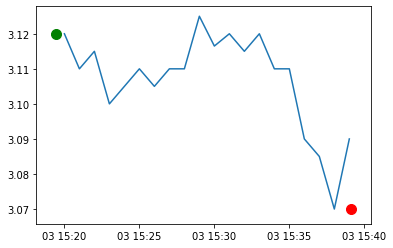

buy time:2020-02-03T15:19:27.754856226Z sell time:2020-02-03T15:39:07.301270166Z
{'rsi': 65.08680899754224, 'macd1': [0.019989499845778802, 0.018002774793559162, 0.017836505595455243, 0.01830069348189234, 0.019253539336145042], 'macd2': [0.013093129203528342, 0.013116814097148488, 0.013437498496920774, 0.013870983027064021, 0.01440755398738025], 'macd_signal': [0.02058799491277619, 0.020070950888932786, 0.019624061830237276, 0.01935938816056829, 0.01933821839568364]}
{'rsi': 37.83355626109401, 'macd': [0.005245573888796873, 0.00363067706735265, 0.0020654239978203925, 3.970181379742144e-05, -0.0015392986128932584], 'too_close': 1, 'macd_signal': [0.006887033705959035, 0.006235762378237758, 0.005401694702154285, 0.004329296124482912, 0.0031555771770076773], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.004694875789900936}
OIS analysis


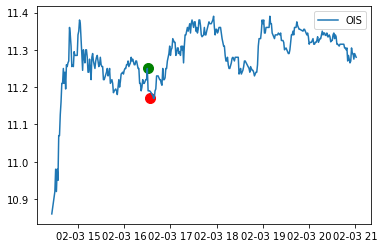

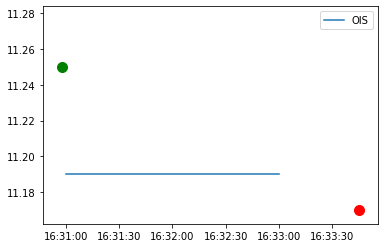

Delta = -0.08000000000000007


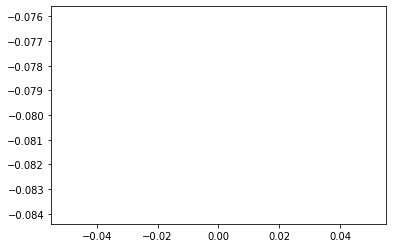

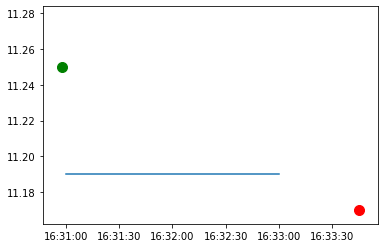

buy time:2020-02-03T16:30:57.539902987Z sell time:2020-02-03T16:33:45.144171708Z
{'rsi': 59.00931752101233, 'macd1': [-0.01033931643803676, -0.010274016386670581, -0.009706912171079551, -0.0091519796697348, -0.005422024237972778], 'macd2': [0.012200506002500333, 0.011478568240839593, 0.010875972054295246, 0.010304169689860032, 0.010401357247108223], 'macd_signal': [-0.004549998159934761, -0.0056948018052819255, -0.0064972238784414505, -0.007028175036700121, -0.006706944876954652]}
{'rsi': 36.13212671807722, 'macd': [-0.005924454205194607, -0.003967971191659814, -0.005508789996804708, -0.0066378852995576665, -0.00821071429781206], 'too_close': 1, 'macd_signal': [-0.004683272057047763, -0.004540211883970173, -0.00473392750653708, -0.005114719065141197, -0.00573391811167537], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.002476796186136691}
SNGX analysis


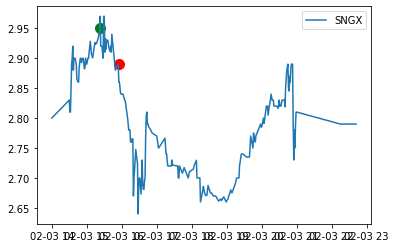

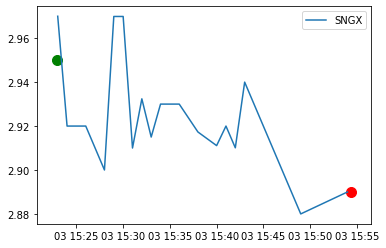

Delta = -0.06000000000000005


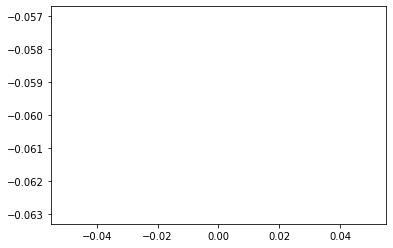

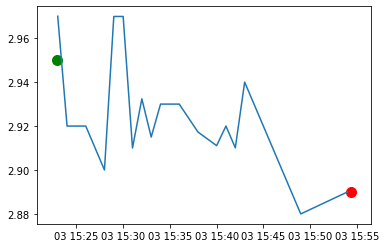

buy time:2020-02-03T15:22:52.515383345Z sell time:2020-02-03T15:54:24.512291682Z
{'rsi': 68.61667172888922, 'macd1': [0.0212652320510216, 0.020980715620509294, 0.02131642821061508, 0.021902910402742393, 0.022742998611357645], 'macd2': [0.027279004555750053, 0.027343177152642006, 0.027518422429266387, 0.02774919639639739, 0.028043484326338852], 'macd_signal': [0.022628689448537867, 0.022299094682932154, 0.02210256138846874, 0.02206263119132347, 0.022198704675330305]}
{'rsi': 44.54775065294251, 'macd': [0.0021460823246055583, 0.0006610217617413205, -0.001024233504928862, -0.0028435982126597814, -0.0038139655405973194], 'too_close': 0, 'macd_signal': [0.004026975168937022, 0.0033537844874978818, 0.002478180889012533, 0.00141382506867807, 0.0003682669468229921], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.004182232487420312}
CDR analysis


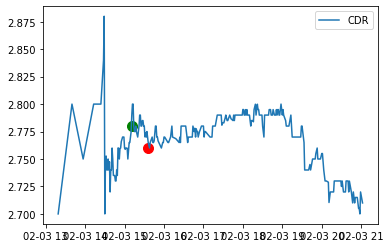

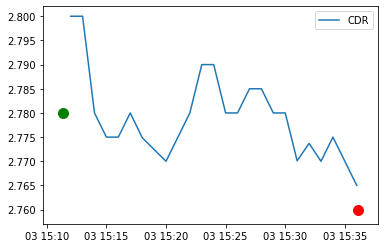

Delta = -0.020000000000000018


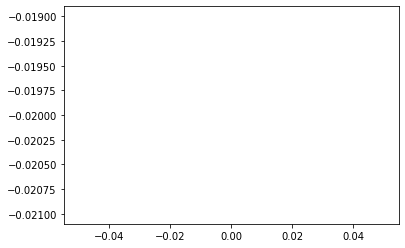

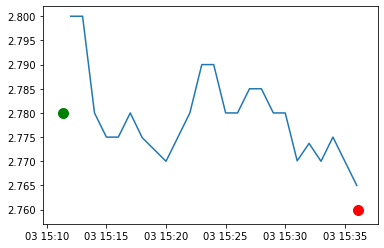

buy time:2020-02-03T15:11:20.901874649Z sell time:2020-02-03T15:36:04.286854032Z
{'rsi': 61.38496911970287, 'macd1': [0.01451948654592572, 0.014021181261457905, 0.013869845995718943, 0.013992077955658822, 0.014327250255262047], 'macd2': [0.02364183368799777, 0.023515640190668208, 0.023441896169029253, 0.023416525285995693, 0.02343569981498206], 'macd_signal': [0.01825603316262854, 0.017409062782394413, 0.016701219425059317, 0.01615939113117922, 0.015792962955995783]}
{'rsi': 41.38582659383188, 'macd': [0.0019262677074540768, 0.0013104206821337172, 0.001073261692505767, 0.0006147837565291248, -0.0002699365021086031], 'too_close': 1, 'macd_signal': [0.0036329093366641854, 0.0031684116057580916, 0.0027493816231076267, 0.002322462049791926, 0.0018039823394118202], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.0020739188415204233}
FLNT analysis


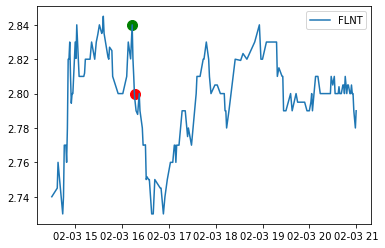

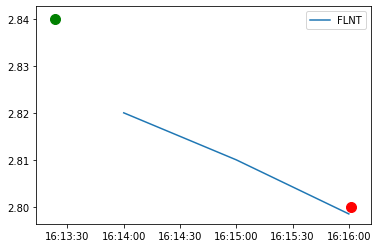

Delta = -0.040000000000000036


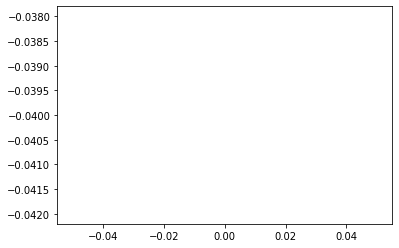

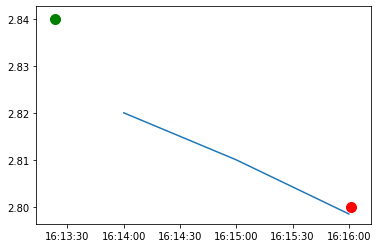

buy time:2020-02-03T16:13:23.54503532Z sell time:2020-02-03T16:16:01.250057422Z
{'rsi': 60.312952184564175, 'macd1': [0.0010430644412977585, 0.0014272512411199756, 0.002509708121423593, 0.0025474198296797645, 0.004127422793929636], 'macd2': [0.012320119976757304, 0.012165380231099476, 0.012163493915352763, 0.011985567330709213, 0.012119373272097445], 'macd_signal': [0.006531341161398553, 0.005510523177342837, 0.004910360166158988, 0.004437772098863144, 0.004375702237876442]}
{'rsi': 43.89973562441176, 'macd': [0.0007313893776408342, 0.0018113503443761836, 0.0015903933009959736, 0.0008780840035438331, -0.00020784641010074267], 'too_close': 1, 'macd_signal': [0.001775857910484099, 0.0017829563972625159, 0.0017444437780092074, 0.0015711718231161327, 0.0012153681764727575], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.0014232145865735002}
CLVS analysis


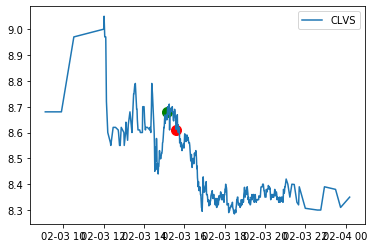

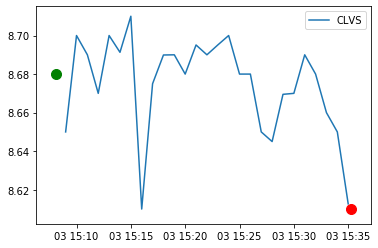

Delta = -0.07000000000000028


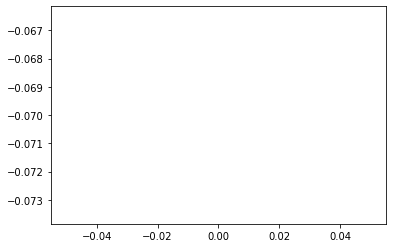

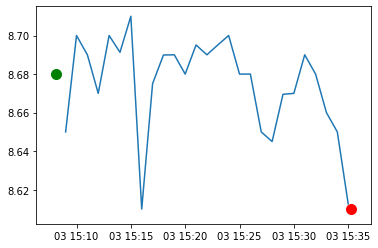

buy time:2020-02-03T15:08:08.473545005Z sell time:2020-02-03T15:35:16.405320543Z
{'rsi': 65.39407529066287, 'macd1': [0.054569956687211985, 0.053925223748537476, 0.052805558639905215, 0.0529140197811202, 0.05320168569197392], 'macd2': [0.04653996779107494, 0.04726272633319972, 0.04785209718489902, 0.04863607716931284, 0.049441112609320825], 'macd_signal': [0.04859170495582281, 0.04965840871436574, 0.05028783869947363, 0.05081307491580295, 0.05129079707103714]}
{'rsi': 39.79153923147556, 'macd': [0.006241990215258397, 0.005960848091058679, 0.004625401655433237, 0.0030052433724083727, -0.0003741688399809817], 'too_close': 1, 'macd_signal': [0.010101797655893896, 0.009273607742926852, 0.00834396652542813, 0.007276221894824178, 0.005746143747863146], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.006120312587844128}
DSLV analysis


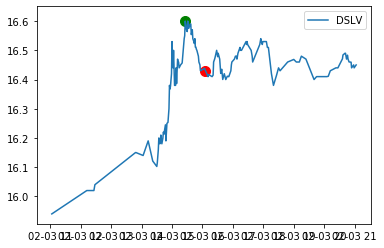

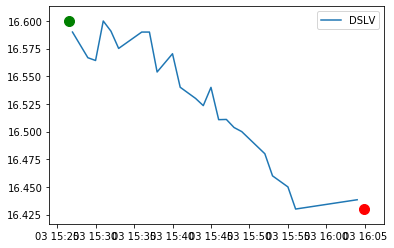

Delta = -0.1700000000000017


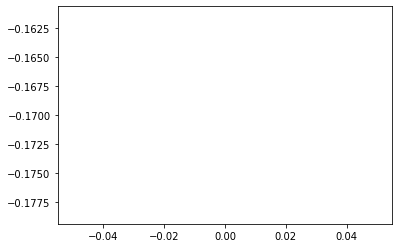

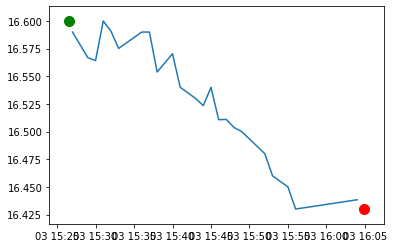

buy time:2020-02-03T15:26:34.588863823Z sell time:2020-02-03T16:04:54.031258015Z
{'rsi': 70.78063003052884, 'macd1': [0.1032666936031994, 0.09808211231436204, 0.0995394105944527, 0.10034453704643909, 0.10382041062510083], 'macd2': [0.13444103106432337, 0.1340788009466536, 0.13486176507918657, 0.13552636060443035, 0.13672073439937904], 'macd_signal': [0.12594964189280183, 0.12037613597711387, 0.11620879090058164, 0.11303594012975313, 0.11119283422882267]}
{'rsi': 40.31199593526487, 'macd': [0.00654121544011943, 0.0028059062847951566, -0.0006606450866897262, -0.004392235180226578, -0.00680656206895236], 'too_close': 0, 'macd_signal': [0.019332671637941102, 0.01602731856731191, 0.012689725836511585, 0.009273333633163952, 0.006057354492740689], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.01286391656169305}
CALA analysis


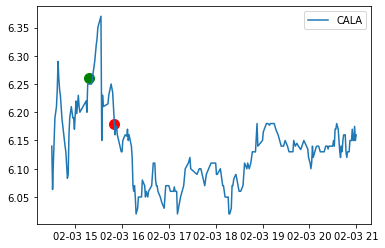

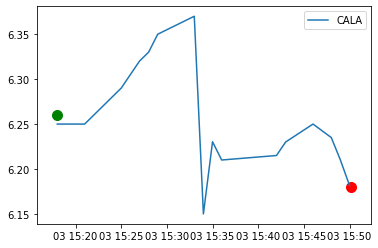

Delta = -0.08000000000000007


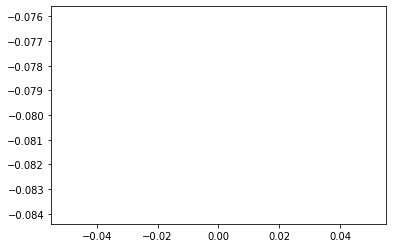

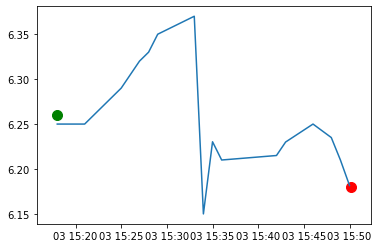

buy time:2020-02-03T15:17:55.639225004Z sell time:2020-02-03T15:50:11.318984958Z
{'rsi': 64.1559237165003, 'macd1': [0.027687136732043705, 0.02790807936384887, 0.026167700179493103, 0.028494551813636804, 0.03158830107897792], 'macd2': [0.037526951596386304, 0.037707851674259274, 0.0374941050419082, 0.03803716484950215, 0.03879583416492682], 'macd_signal': [0.03197651233908955, 0.03116282574404141, 0.03016380063113175, 0.029829950867632758, 0.030181620909901792]}
{'rsi': 44.060277339251016, 'macd': [0.007044875588372079, 0.006587157733219939, 0.005365726187214648, 0.0030455752917921686, -0.00036032898115756495], 'too_close': 1, 'macd_signal': [0.015248555471092088, 0.013516275923517658, 0.011886165976257055, 0.010118047839364078, 0.00802237247525975], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.008382701456417315}
EAF analysis


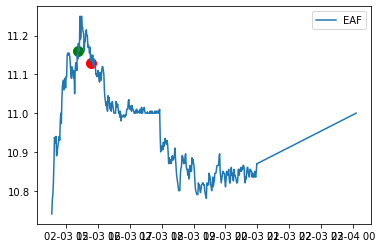

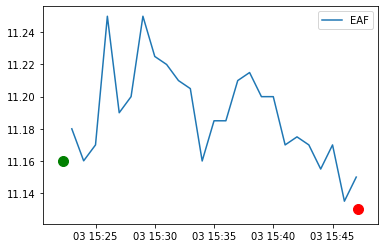

Delta = -0.02999999999999936


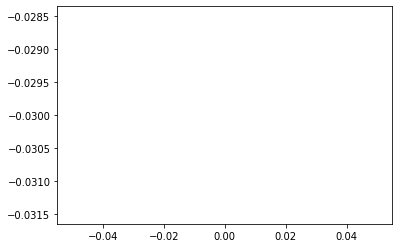

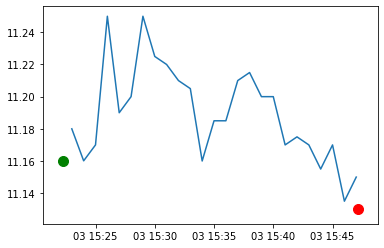

buy time:2020-02-03T15:22:14.604543391Z sell time:2020-02-03T15:47:07.032236994Z
{'rsi': 62.19618557063854, 'macd1': [0.025731955441363752, 0.02586140138051185, 0.024072660718811534, 0.025587776602451484, 0.02728095541040254], 'macd2': [0.0442295013110261, 0.04419869812549493, 0.043779796517174674, 0.04396411807382705, 0.04422332136433482], 'macd_signal': [0.03618965468038939, 0.034124004020413885, 0.03211373536009342, 0.030808543608565032, 0.030103025968932533]}
{'rsi': 42.60243863925981, 'macd': [0.006115780321660935, 0.0039018971554884985, 0.0029053401798275758, 0.0002728887678866698, -0.0020416563422998024], 'too_close': 1, 'macd_signal': [0.011526226792364105, 0.010001360864988984, 0.008582156727956702, 0.0069203031359426955, 0.005127911240294196], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.007169567582593998}
WPRT analysis


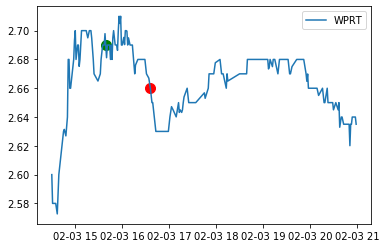

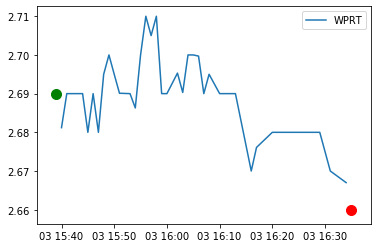

Delta = -0.029999999999999805


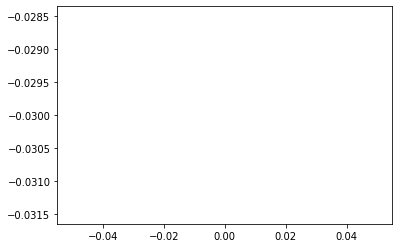

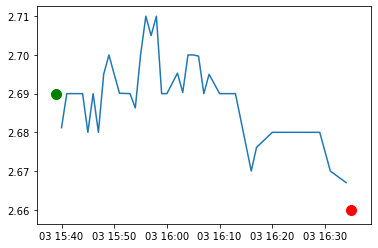

buy time:2020-02-03T15:39:02.63179091Z sell time:2020-02-03T16:34:59.270195475Z
{'rsi': 61.07658393105157, 'macd1': [0.005114072343972875, 0.005351606029762479, 0.0054767209570361075, 0.0055123326982671195, 0.00610761445908059], 'macd2': [0.013610661280744285, 0.013546281333711718, 0.013465384339127251, 0.013369420515898067, 0.013386097669310981], 'macd_signal': [0.01081500094889373, 0.00972232196506748, 0.008873201763461205, 0.008201027950422388, 0.007782345252154028]}
{'rsi': 36.20309973892511, 'macd': [-0.002280114188124127, -0.00233933125268182, -0.002355093494510019, -0.0028562706505517177, -0.0033655480364207513], 'too_close': 1, 'macd_signal': [-0.0009826169390462147, -0.0012539598017733357, -0.0014741865403206723, -0.0017506033623668814, -0.0020735922971776553], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.001291955739243096}
SXC analysis


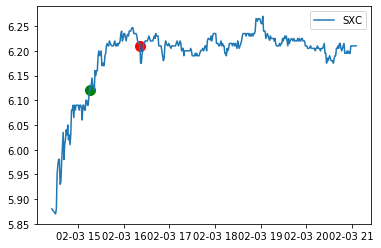

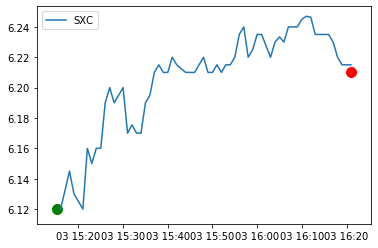

Delta = 0.08999999999999986


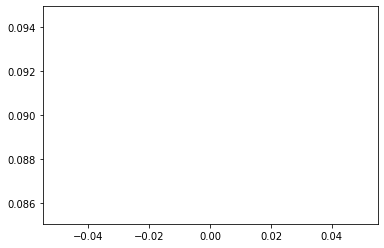

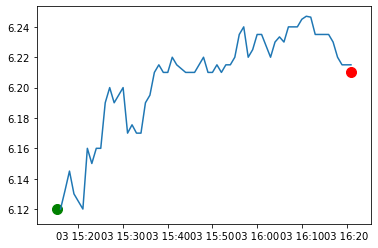

buy time:2020-02-03T15:15:06.527939856Z sell time:2020-02-03T16:21:03.663369658Z
{'rsi': 65.59851313347629, 'macd1': [0.021445134530514665, 0.020193901525979996, 0.01898346083552216, 0.019422192934615445, 0.020334336967414046], 'macd2': [0.033667427275883455, 0.0333983670978677, 0.03309740710666187, 0.033089051021820026, 0.033186778508700776], 'macd_signal': [0.025745128069290923, 0.024634882760628737, 0.02350459837560742, 0.022688117287409028, 0.02221736122341003]}
{'rsi': 39.97493300256986, 'macd': [0.0040944169745458225, 0.0029312771047438346, 0.00172712555548582, 0.0007663954449537158, -0.0002519188677325701], 'too_close': 1, 'macd_signal': [0.005741358694012068, 0.005179342376158421, 0.004488899012023901, 0.003744398298609864, 0.0029451348653413774], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.0031970537330739475}
TGS analysis


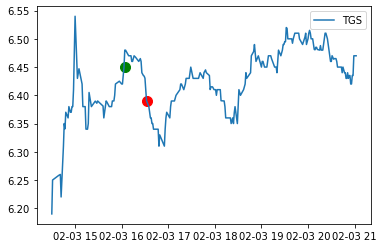

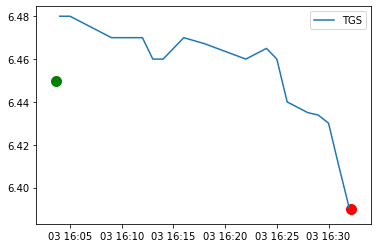

Delta = -0.0600000000000005


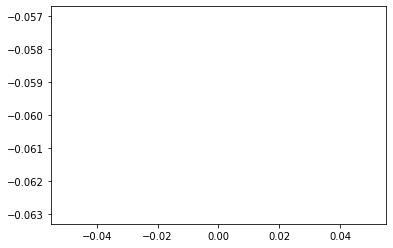

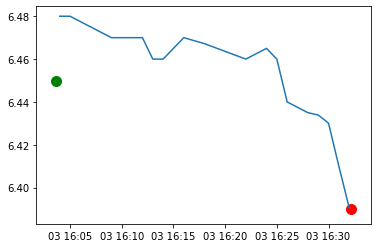

buy time:2020-02-03T16:03:40.796322711Z sell time:2020-02-03T16:32:11.262081191Z
{'rsi': 66.57772253138926, 'macd1': [0.013012310612572797, 0.01471706260690464, 0.015486118299250506, 0.01591217482972951, 0.01845780687121934], 'macd2': [0.026333319211785167, 0.0265178172476368, 0.026565181786422976, 0.026566271381224915, 0.027004592881470835], 'macd_signal': [0.013538647300869847, 0.013774330362076806, 0.014116687949511545, 0.014475785325555138, 0.015272189634687978]}
{'rsi': 34.0055890889161, 'macd': [0.007294630841164107, 0.005676451720431963, 0.004144410175439539, 0.0018526322160248299, -0.0009650211577536538], 'too_close': 1, 'macd_signal': [0.011277088940035191, 0.010156961496114546, 0.008954451231979545, 0.007534087428788602, 0.005834265711480151], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.006799286869233805}
ELOX analysis


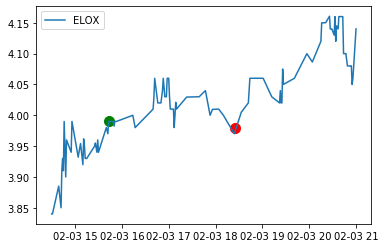

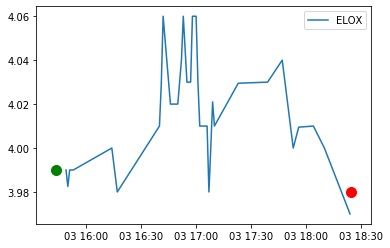

Delta = -0.010000000000000231


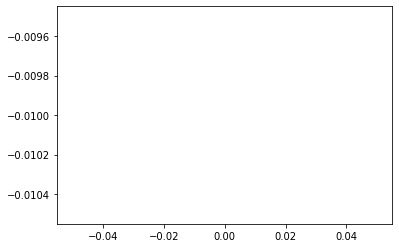

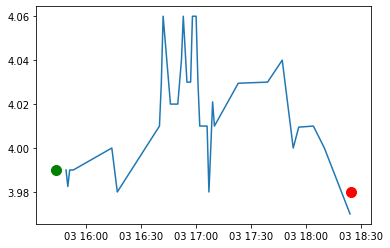

buy time:2020-02-03T15:43:39.183320145Z sell time:2020-02-03T18:24:31.880332863Z
{'rsi': 58.96538433674484, 'macd1': [0.01570319797647146, 0.01434186305274876, 0.01630273326290599, 0.016855520655332246, 0.018691972080676855], 'macd2': [0.009542953098199636, 0.009621785587031972, 0.01031866939928916, 0.010783385502610265, 0.011513564715617264], 'macd_signal': [0.01675170887348299, 0.016269739709336144, 0.016276338420050114, 0.016392174867106542, 0.016852134309820604]}
{'rsi': 43.31032960848146, 'macd': [0.004797152880329669, 0.003179715256783844, 0.002371585741594906, 0.0017370486422061404, -0.0003383964825403041], 'too_close': 1, 'macd_signal': [0.0061376013146240155, 0.005546024103055981, 0.004911136430763767, 0.004276318873052241, 0.003353375801933732], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.003691772284474036}
AKBA analysis


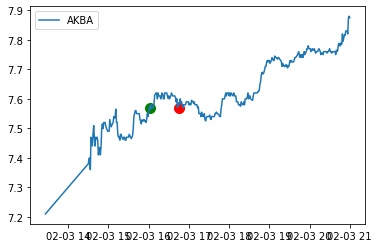

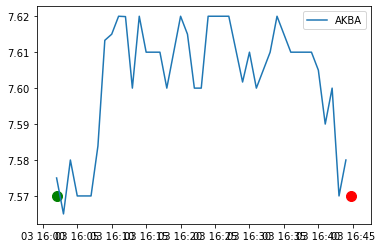

Delta = 0.0


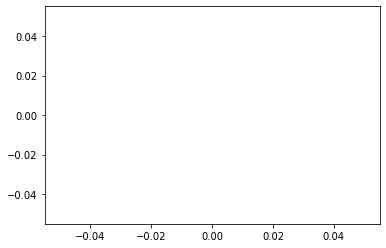

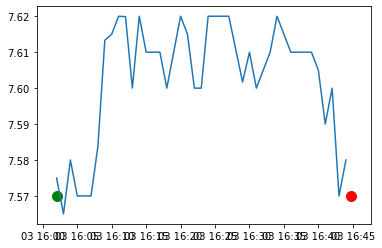

buy time:2020-02-03T16:01:59.540887312Z sell time:2020-02-03T16:44:47.245850024Z
{'rsi': 66.90081514876974, 'macd1': [0.006194279062094132, 0.007572439099556405, 0.007768177714668312, 0.009029589134317284, 0.011111554330517137], 'macd2': [0.02133725230060346, 0.021277272505987987, 0.02102812312676594, 0.021005170222289316, 0.02119036201993474], 'macd_signal': [0.009190870281203517, 0.008867184044874094, 0.008647382778832938, 0.008723824049929807, 0.009201370106047272]}
{'rsi': 37.328877377156765, 'macd': [0.0026126646864650382, 0.0013763668338784285, 0.0009146234833714573, -0.0010154963155093455, -0.0025062975053451453], 'too_close': 1, 'macd_signal': [0.00425310664214461, 0.0036777586804913735, 0.0031251316410673903, 0.002297006049752043, 0.0013363453387326054], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.0038426428440777507}
RCEL analysis


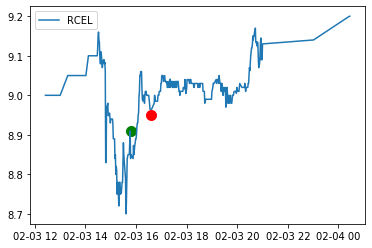

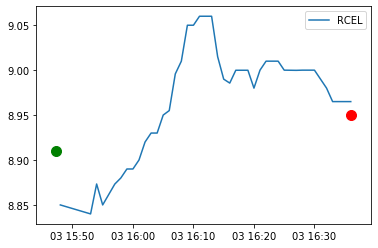

Delta = 0.03999999999999915


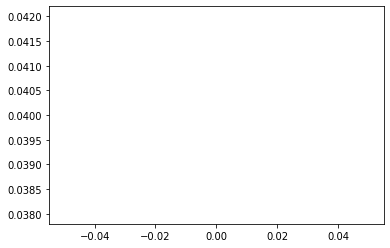

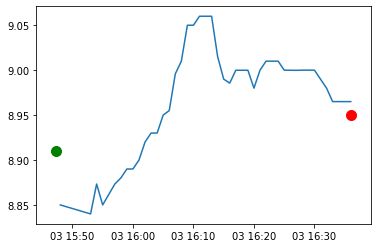

buy time:2020-02-03T15:47:21.437397483Z sell time:2020-02-03T16:36:03.526183285Z
{'rsi': 61.14372273406386, 'macd1': [-0.010007142081981613, -0.005336219100215089, -0.001615852443842769, 0.003710541403101786, 0.010234519016485422], 'macd2': [-0.0019023428880533544, -0.0014032726524675354, -0.0009418677333581371, -3.6045986137267505e-05, 0.001277204723301395], 'macd_signal': [-0.019480885809915617, -0.01665195246797551, -0.013644732463148962, -0.01017367768989881, -0.006092038348621964]}
{'rsi': 40.164822465944084, 'macd': [0.006500783119845366, 0.004304781197474128, 0.0025377046190353525, 0.0011278046277976017, -0.0007491019189842518], 'too_close': 1, 'macd_signal': [0.011774548397674145, 0.010280594957634141, 0.008732016889914384, 0.007211174437491028, 0.005619119166195972], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.006368221085180223}
HARP analysis


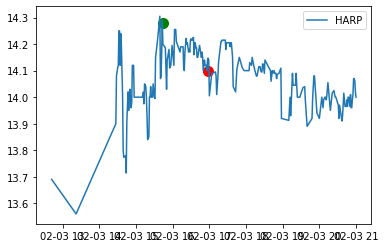

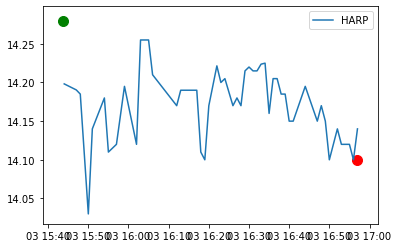

Delta = -0.17999999999999972


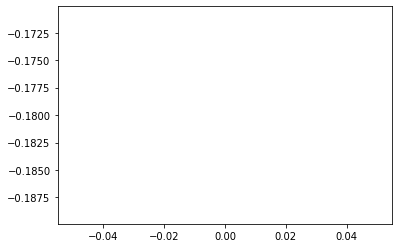

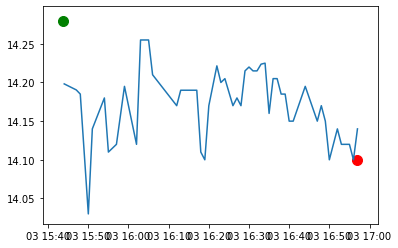

buy time:2020-02-03T15:43:39.780919998Z sell time:2020-02-03T16:57:00.337487715Z
{'rsi': 63.055246891943554, 'macd1': [0.06676461753174401, 0.060317050992535926, 0.055375885743954356, 0.05765416498516274, 0.06875362404895569], 'macd2': [0.09584562607557245, 0.0945556560507459, 0.0933775498327023, 0.09350376630329293, 0.09546954360581772], 'macd_signal': [0.043575340224891054, 0.046923682378420026, 0.04861412305152689, 0.05042213143825406, 0.05408842996039438]}
{'rsi': 41.683687106100116, 'macd': [-0.006563467112401966, -0.0072030744268438696, -0.008646884354632789, -0.009659633852198368, -0.01136230055352172], 'too_close': 1, 'macd_signal': [-0.00025843509839617814, -0.0016473629640857165, -0.003047267242195131, -0.004369740564195778, -0.005768252562060967], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.005594047991460753}
NIO analysis


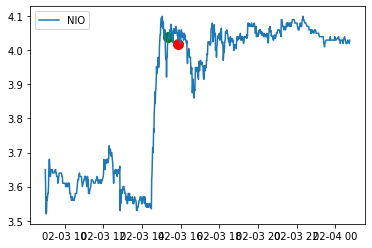

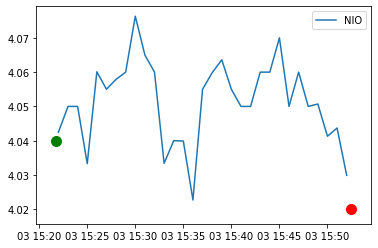

Delta = -0.020000000000000462


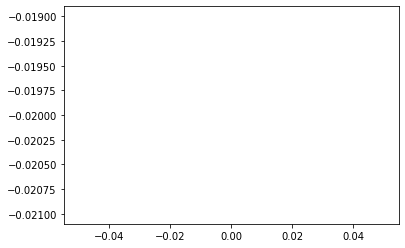

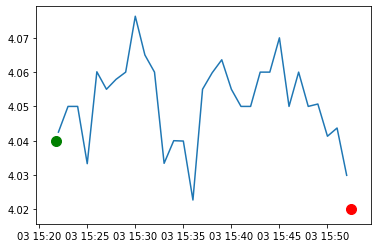

buy time:2020-02-03T15:21:46.641339043Z sell time:2020-02-03T15:52:27.373625714Z
{'rsi': 58.662826115657076, 'macd1': [0.0010243720420870517, -0.0008452936869827177, 0.00036388893197436545, 0.002687164329367775, 0.006016372525851743], 'macd2': [0.0330744583960203, 0.03203885351745317, 0.03156900855957501, 0.03136293527596212, 0.03143185716052965], 'macd_signal': [0.021786381500861478, 0.017260046463292638, 0.013880814957028984, 0.011642084831496742, 0.010516942370367741]}
{'rsi': 42.716948382440414, 'macd': [0.003336407555238452, 0.0028408534902775173, 0.0019295015761482404, 0.0013189740901236036, -0.00014531971833875446], 'too_close': 1, 'macd_signal': [0.00418950008498817, 0.0039197707660460395, 0.00352171692806648, 0.0030811683604779045, 0.0024358707447145727], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.002581190463053327}
KDMN analysis


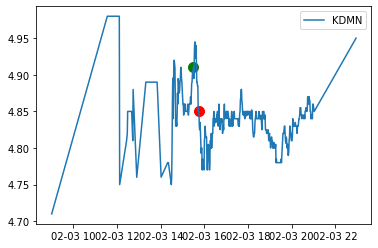

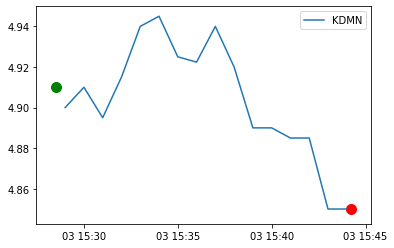

Delta = -0.0600000000000005


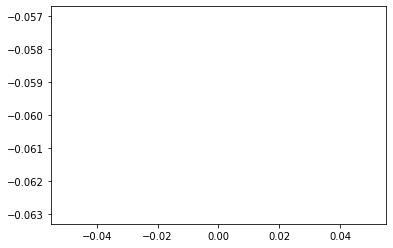

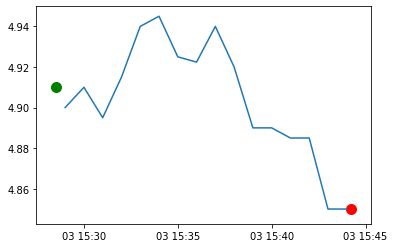

buy time:2020-02-03T15:28:31.723329644Z sell time:2020-02-03T15:44:14.14781984Z
{'rsi': 68.7914912909792, 'macd1': [0.004563420581374267, 0.006293644543286625, 0.007768963663949968, 0.00963402606715924, 0.011783188621614649], 'macd2': [0.029009843852664474, 0.028774999789049183, 0.028551298793633606, 0.028459758935326818, 0.028489957955835976], 'macd_signal': [0.003894521045792949, 0.004374345745291684, 0.005053269329023341, 0.005969420676650521, 0.0071321742656433465]}
{'rsi': 36.873956637513075, 'macd': [0.007053255681253923, 0.005208879972779634, 0.0037040563041932373, 0.0006651799870578401, -0.0017114142858662973], 'too_close': 1, 'macd_signal': [0.009303889947468372, 0.008484887952530624, 0.007528721622863147, 0.006156013295702085, 0.004582527779388408], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.006293942065254706}
CERS analysis


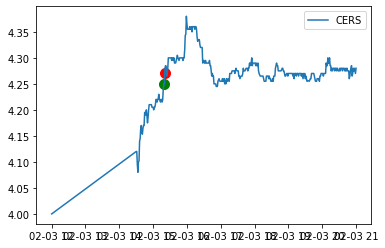

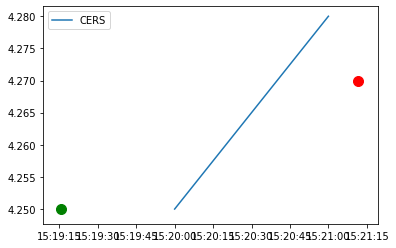

Delta = 0.019999999999999574


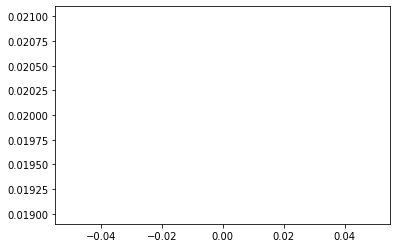

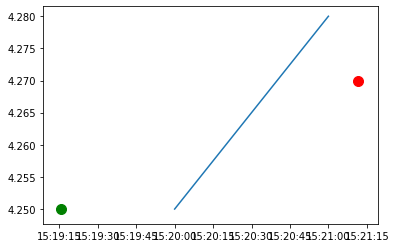

buy time:2020-02-03T15:19:15.484491823Z sell time:2020-02-03T15:21:11.528523307Z
{'rsi': 73.47504730972878, 'macd1': [0.014319240870733552, 0.013105767944038504, 0.012404548210086297, 0.013309238752317043, 0.014664090444921563], 'macd2': [0.026089641977840472, 0.02574978407693429, 0.025475888768540678, 0.025503023250871948, 0.025647135346369865], 'macd_signal': [0.01774015166914677, 0.016813274924125116, 0.01593152958131735, 0.01540707141551729, 0.015258475221398145]}
{'rsi': 78.74781675432062, 'macd': [0.006261914501386023, 0.0069053729510137885, 0.007836569496815216, 0.008460403565012875, 0.009875593701725194], 'too_close': 0, 'macd_signal': [0.00838644998279733, 0.008090234576440623, 0.008039501560515541, 0.008123681961415007, 0.008474064309477045], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': 0.0014015293922481492}
BCEL analysis


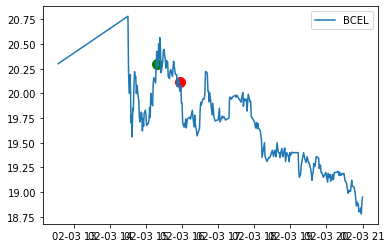

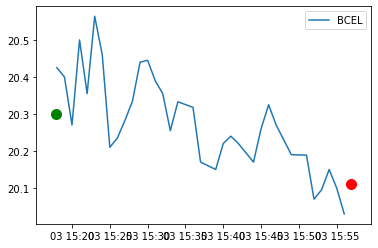

Delta = -0.19000000000000128


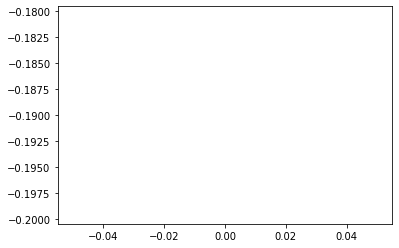

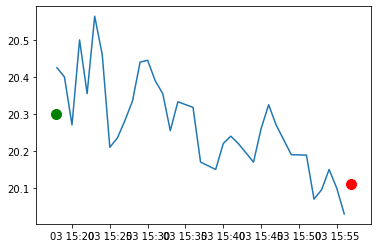

buy time:2020-02-03T15:17:56.114154466Z sell time:2020-02-03T15:56:55.326991423Z
{'rsi': 65.22695003102676, 'macd1': [0.07966501443038254, 0.09624151884135657, 0.10664030128480917, 0.11081210745805947, 0.12917107688202378], 'macd2': [0.16390044748057164, 0.16613961061896276, 0.1676349148728491, 0.16818915534813783, 0.17170876778806132], 'macd_signal': [0.0676120689333142, 0.07333795891492267, 0.07999842738889998, 0.08616116340273187, 0.09476314609859025]}
{'rsi': 43.47587478277092, 'macd': [0.003979597734304008, 0.00035047178796432377, -0.008653398712919369, -0.014253123795260336, -0.018545726147795705], 'too_close': 0, 'macd_signal': [0.015309128541911608, 0.01231739719112215, 0.008123238010313845, 0.0036479656491990083, -0.0007907727101999348], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.01775495343759577}
ETRN analysis


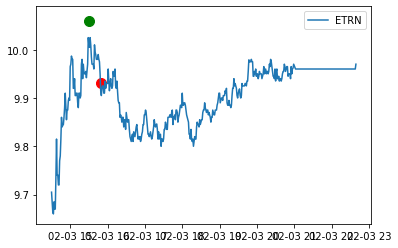

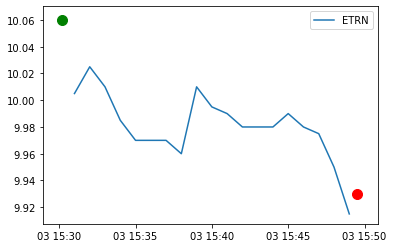

Delta = -0.13000000000000078


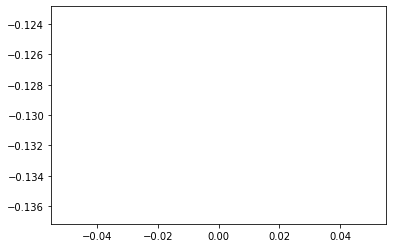

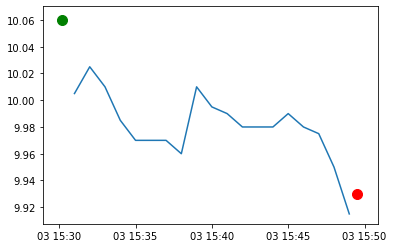

buy time:2020-02-03T15:30:12.691922255Z sell time:2020-02-03T15:49:32.318650853Z
{'rsi': 72.32542118208049, 'macd1': [0.020185328835371052, 0.019635608351384448, 0.02017772924454242, 0.024759986591094574, 0.03085993195843706], 'macd2': [0.03598559113132005, 0.03572994386986572, 0.03567749919809948, 0.03645183538901264, 0.037665725926292026], 'macd_signal': [0.022570531408466845, 0.021983546797050366, 0.021622383286548776, 0.022249903947457936, 0.02397190954965376]}
{'rsi': 40.81294966176387, 'macd': [0.005930152241745645, 0.005207325788330053, 0.004316716528677489, 0.002267972735069179, -0.00013712597079518218], 'too_close': 1, 'macd_signal': [0.008232011976276567, 0.007627074738687264, 0.006965003096685309, 0.006025597024362083, 0.00479305242533063], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.004930178396125812}
NYMX analysis


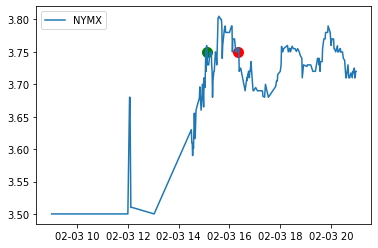

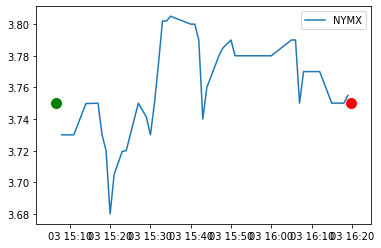

Delta = 0.0


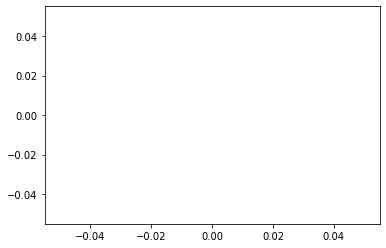

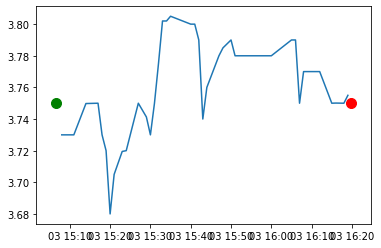

buy time:2020-02-03T15:06:39.891465768Z sell time:2020-02-03T16:19:48.564187387Z
{'rsi': 61.839392523167916, 'macd1': [0.017172870167507792, 0.018963583735553957, 0.023046181730626447, 0.023485297746929312, 0.02674460177398208], 'macd2': [-0.0018959882875297929, -0.0008896615341220659, 0.0006181819307831127, 0.0015038576944870208, 0.002954447259263304], 'macd_signal': [0.011151219054238076, 0.012713691990501253, 0.014780189938526292, 0.016521211500206898, 0.018565889554961933]}
{'rsi': 48.20656379003697, 'macd': [0.0045933816093777224, 0.0029030780483774166, 0.0015534508833332517, 0.00047642386013846405, -0.00010926503923558428], 'too_close': 0, 'macd_signal': [0.007880008603069085, 0.006884622492130751, 0.005818388170371251, 0.004749995308324694, 0.0037781432388126384], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.0038874082780482226}
M analysis


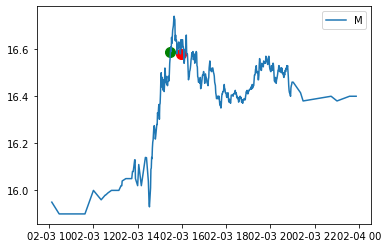

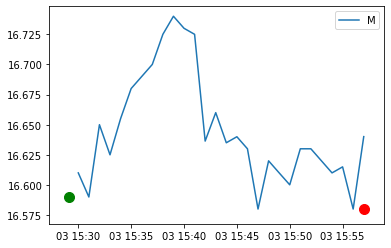

Delta = -0.010000000000001563


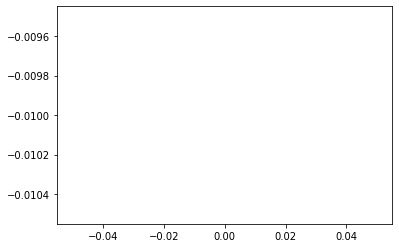

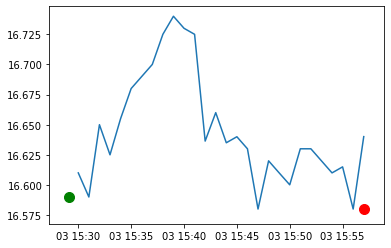

buy time:2020-02-03T15:29:08.585535059Z sell time:2020-02-03T15:57:01.418246138Z
{'rsi': 69.91455493481625, 'macd1': [0.03722667040193883, 0.037065077697036486, 0.040105823267872154, 0.043626568962768175, 0.048280981470590234], 'macd2': [0.07316072003259677, 0.07273976870166976, 0.07295585503223023, 0.07335785072454826, 0.07409018206606177], 'macd_signal': [0.047548100189193025, 0.04545149569076172, 0.04438236120618381, 0.044231202757500684, 0.0450411585001186]}
{'rsi': 44.82673991900409, 'macd': [0.006322726132811596, 0.004786128406244927, 0.0037863622763723015, 0.00113996837937691, -0.0009369615193151049], 'too_close': 1, 'macd_signal': [0.01439836239202103, 0.01247591559486581, 0.010738004931167108, 0.008818397620809068, 0.006867325792784233], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.007804287312099338}
APTO analysis


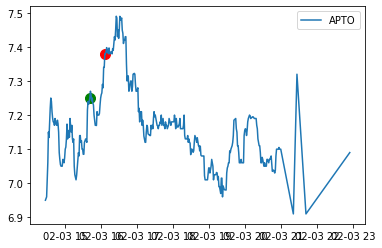

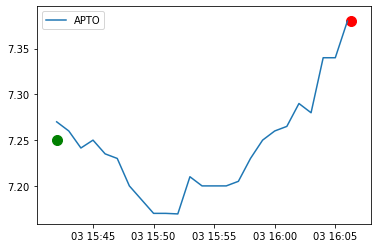

Delta = 0.1299999999999999


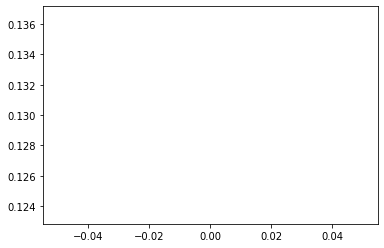

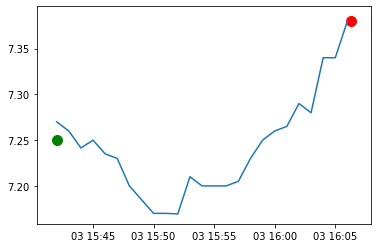

buy time:2020-02-03T15:41:59.49349955Z sell time:2020-02-03T16:06:19.293865808Z
{'rsi': 69.75833316691286, 'macd1': [0.0054127754427568675, 0.01315971121775572, 0.021073581568905375, 0.0263716443047759, 0.03168184565846577], 'macd2': [0.02363399122856702, 0.024733311156524884, 0.026105003243531044, 0.02719250563426545, 0.02844223493396303], 'macd_signal': [0.0026416718257051526, 0.004745279704115266, 0.008010940077073288, 0.01168308092261381, 0.015682833869784203]}
{'rsi': 78.47543966423899, 'macd': [0.015111080897326268, 0.0161268843518787, 0.01983105737683033, 0.02245987976800201, 0.026294548127772543], 'too_close': 0, 'macd_signal': [0.011833201065668644, 0.012691937722910655, 0.01411976165369459, 0.015787785276556075, 0.01788913784679937], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': 0.008405410280973174}
ONCY analysis


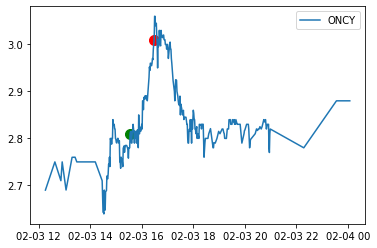

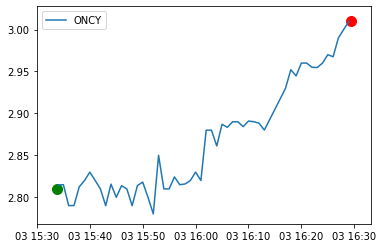

Delta = 0.19999999999999973


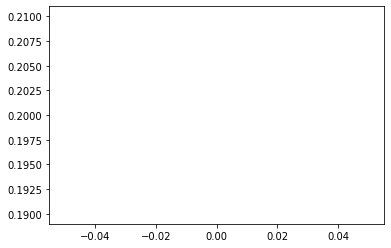

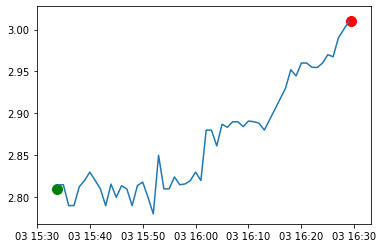

buy time:2020-02-03T15:33:42.664960173Z sell time:2020-02-03T16:29:26.18967415Z
{'rsi': 62.29371436446903, 'macd1': [0.0035411969913772268, 0.0019248098663511293, 0.002391460296985226, 0.002729816499937865, 0.005747846955243219], 'macd2': [0.021363856331356956, 0.02063898726557678, 0.02029093461886644, 0.01993826253627695, 0.02014008120393651], 'macd_signal': [0.0033715656641601613, 0.003082214504598355, 0.002944063663075729, 0.0029012142304481563, 0.003470540775407169]}
{'rsi': 78.54833863064398, 'macd': [0.02047516074126232, 0.020221596995056768, 0.020930227881194696, 0.0217300671706373, 0.02259059041993483], 'too_close': 0, 'macd_signal': [0.018784864512843284, 0.01907221100928598, 0.019443814383667723, 0.019901064941061638, 0.020438970036836278], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': 0.002151620383098553}
AXL analysis


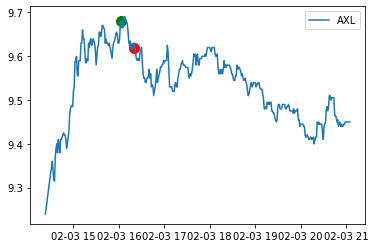

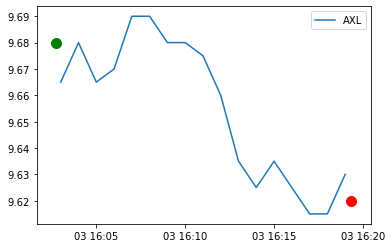

Delta = -0.0600000000000005


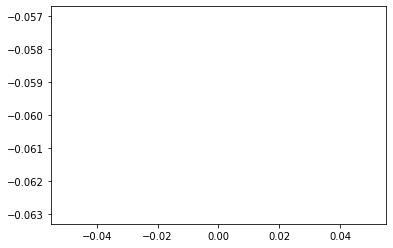

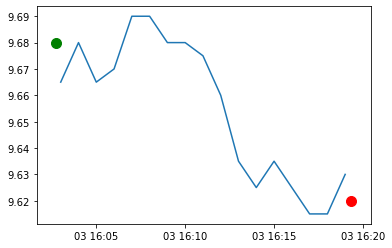

buy time:2020-02-03T16:02:45.616917523Z sell time:2020-02-03T16:19:20.806253922Z
{'rsi': 64.36794698737636, 'macd1': [0.006309994806677821, 0.005249876849250157, 0.004359472445576884, 0.0044099023578478835, 0.007590040866233494], 'macd2': [0.029329980677555767, 0.028572527203454712, 0.02782994801404115, 0.027262177319562042, 0.02733595217870821], 'macd_signal': [0.00490025954818459, 0.004970183008397704, 0.00484804089583354, 0.004760413188236409, 0.005326338723835826]}
{'rsi': 41.239978573519764, 'macd': [0.004680162128087417, 0.0022646355914357486, 0.0008724767889631835, -0.0012626141842488892, -0.002650183589555155], 'too_close': 1, 'macd_signal': [0.006707971988265815, 0.005819304708899802, 0.004829939124912478, 0.0036114284630802043, 0.0023591060525531326], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.005009289642108288}
SOGO analysis


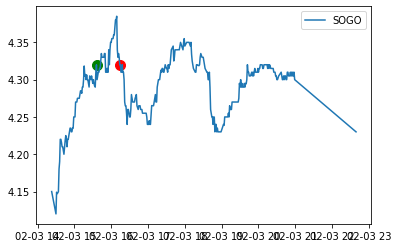

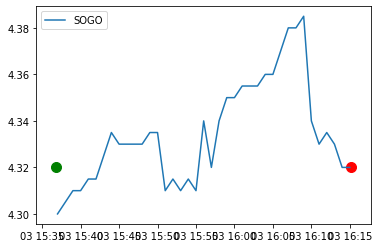

Delta = 0.0


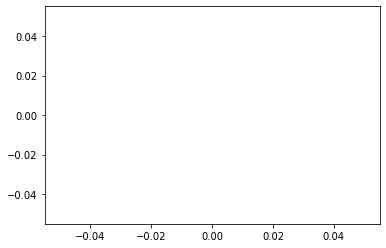

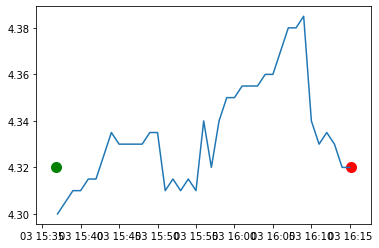

buy time:2020-02-03T15:36:50.73369983Z sell time:2020-02-03T16:15:09.190300497Z
{'rsi': 66.44073103425202, 'macd1': [0.01107053492616572, 0.009721129011486696, 0.008441439146578134, 0.00893807598579155, 0.010023041304425995], 'macd2': [0.017525061348091953, 0.01725170130934739, 0.016950218600674916, 0.016965607410327266, 0.017112567514833366], 'macd_signal': [0.014944973102529471, 0.013900204284320917, 0.01280845125677236, 0.012034376202576198, 0.011632109222946158]}
{'rsi': 41.23812406020498, 'macd': [0.00605516692631447, 0.0045200033671637385, 0.0030053304202004583, 0.0012665550015249494, -0.00010478370135924564], 'too_close': 1, 'macd_signal': [0.007753651199007392, 0.007106921632638661, 0.00628660339015102, 0.005282593712425806, 0.004205118229668796], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.004309901931028042}
NEW analysis


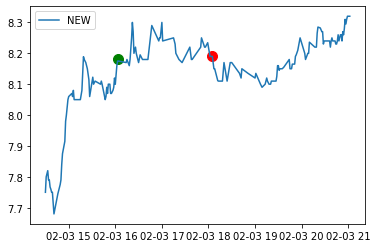

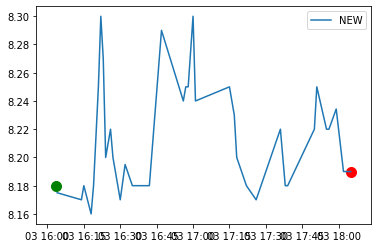

Delta = 0.009999999999999787


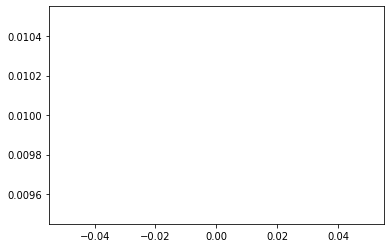

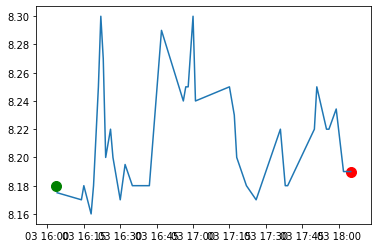

buy time:2020-02-03T16:03:43.953657149Z sell time:2020-02-03T18:05:08.418203591Z
{'rsi': 66.14286412810694, 'macd1': [0.022476885307474603, 0.023627757034459407, 0.022664733378571, 0.026438264891723406, 0.030688886277904004], 'macd2': [0.04435329837262625, 0.04442381986309574, 0.044097780147029475, 0.04468690109574691, 0.04547731281050815], 'macd_signal': [0.0334675894762075, 0.031499622987857884, 0.029732645066000506, 0.029073769031145086, 0.02939679248049687]}
{'rsi': 47.72509588580552, 'macd': [0.0039748808778732325, 0.004578127039920332, 0.0026874340877505176, 0.0011792651108937235, -1.12466257586874e-05], 'too_close': 1, 'macd_signal': [0.005904356203713034, 0.005639110370954494, 0.005048775114313698, 0.004274873113629703, 0.003417649165752025], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.0034288957915107124}
AVXL analysis


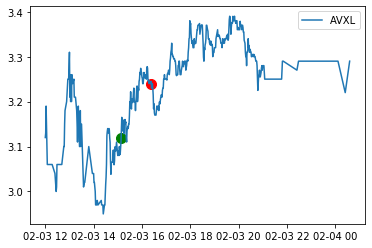

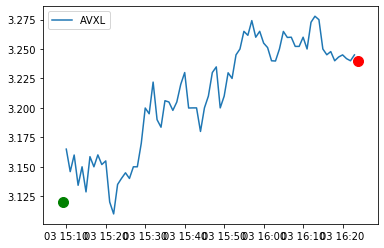

Delta = 0.1200000000000001


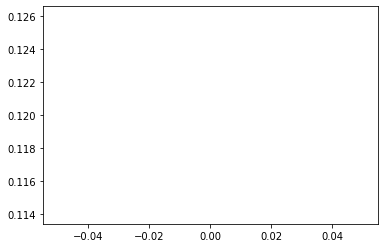

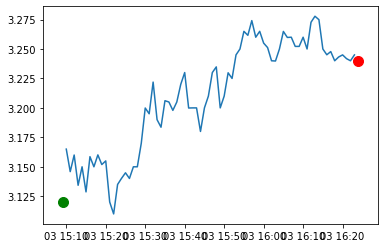

buy time:2020-02-03T15:09:06.805930321Z sell time:2020-02-03T16:23:47.171500633Z
{'rsi': 60.550938224621866, 'macd1': [0.014240812096139699, 0.012837968184574944, 0.012773199100760912, 0.01362190481457315, 0.014921353395883852], 'macd2': [0.03197256500339485, 0.03146440293073205, 0.031183259971547805, 0.031084242382995342, 0.031101764797713205], 'macd_signal': [0.020037214473678684, 0.018597365215857937, 0.01743253199283853, 0.016670406557185456, 0.016320595924925137]}
{'rsi': 49.56073248033228, 'macd': [0.001822827466879673, 0.001283766407135456, 0.0006808127708786138, 0.00010863055079646244, -7.889625122592392e-05], 'too_close': 0, 'macd_signal': [0.004653284923799397, 0.003979381220466609, 0.00331966753054901, 0.0026774601345985007, 0.0021261888574336156], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.0022050851086595396}
SPAR analysis


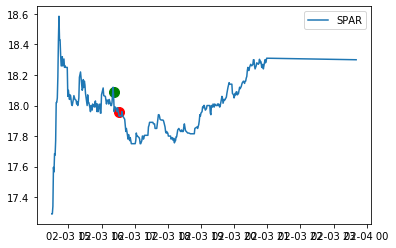

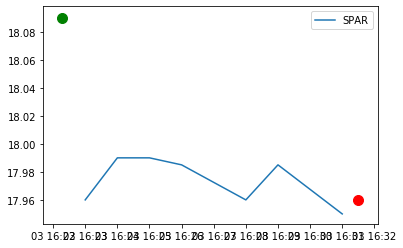

Delta = -0.129999999999999


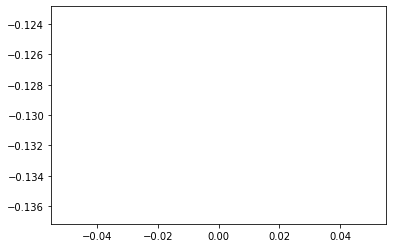

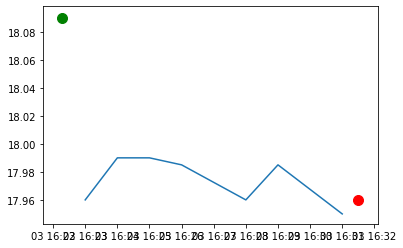

buy time:2020-02-03T16:22:17.354414265Z sell time:2020-02-03T16:31:29.211391759Z
{'rsi': 58.91825363566983, 'macd1': [0.0008009176954537622, -0.001392371349435706, -0.0014994511270600697, 0.002422346211005788, 0.007860536761217674], 'macd2': [0.032999443286353625, 0.03158190040542408, 0.030547076826600517, 0.030345830380305472, 0.030591951374130844], 'macd_signal': [0.0022721926633770843, 0.0015392798608145262, 0.0009315336632396069, 0.0012296961727928431, 0.002555864290477809]}
{'rsi': 43.63551575413607, 'macd': [-0.0026500385967338502, -0.004273085842804392, -0.006781004659966783, -0.007348460820612246, -0.008993901194873644], 'too_close': 1, 'macd_signal': [0.0010476800842585308, -1.6473101154053805e-05, -0.0013693794129165998, -0.002565195694455729, -0.003850936794539312], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.0051429644003343315}
OCFT analysis


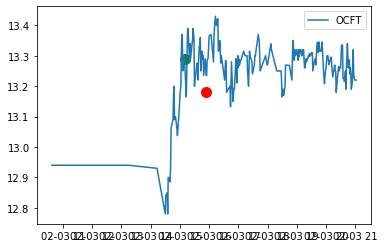

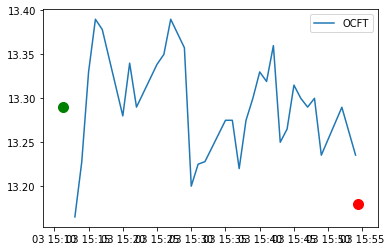

Delta = -0.10999999999999943


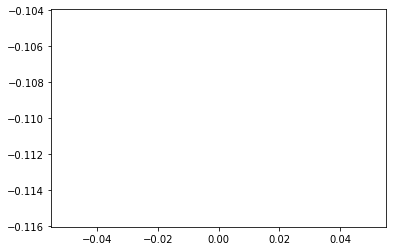

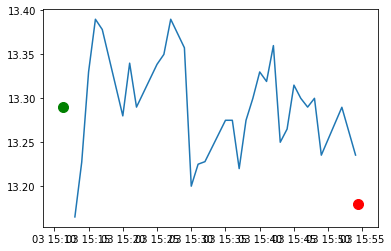

buy time:2020-02-03T15:11:12.804826219Z sell time:2020-02-03T15:54:17.286146749Z
{'rsi': 67.45931920443797, 'macd1': [0.11570349037771521, 0.1145448901268491, 0.11632040400293064, 0.11638588747845802, 0.11710515929001453], 'macd2': [0.06265252901343743, 0.06506157673765678, 0.06797360093056959, 0.0705440420597867, 0.07319594484670766], 'macd_signal': [0.09590580481336036, 0.0996336218760581, 0.10297097830143262, 0.1056539601368377, 0.10794419996747306]}
{'rsi': 43.07778996851048, 'macd': [0.009668998686700903, 0.009181904429500065, 0.0053220659897394995, 0.00507645076408636, -0.0008847617593339407], 'too_close': 1, 'macd_signal': [0.013879977986217778, 0.012940363274874234, 0.011416703817847287, 0.010148653207095102, 0.007941970213809293], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.008826731973143234}
GGAL analysis


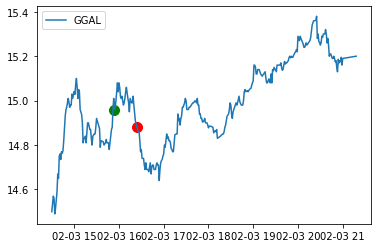

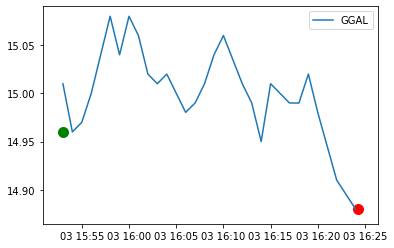

Delta = -0.08000000000000007


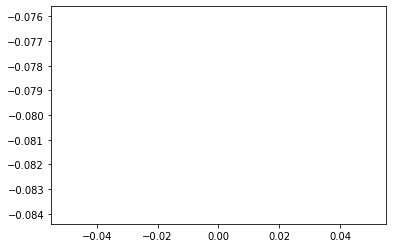

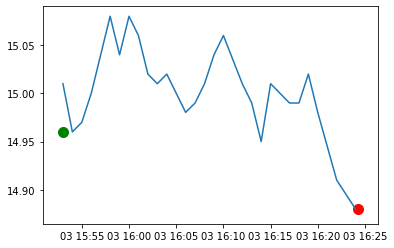

buy time:2020-02-03T15:52:59.485149567Z sell time:2020-02-03T16:24:12.346354902Z
{'rsi': 63.919100864689725, 'macd1': [-0.020019111369210307, -0.021938622112113393, -0.016013012328210507, -0.010390235291497518, 0.0005152479742065452], 'macd2': [0.033214991443868414, 0.03118443590729747, 0.03070580894477004, 0.030376283204445187, 0.03130401456737708], 'macd_signal': [-0.01855197170138499, -0.019229301783530668, -0.018586043892466635, -0.01694688217227281, -0.01345445614297694]}
{'rsi': 39.59084048095661, 'macd': [0.010222130759727222, 0.010450256672555724, 0.008414377427063968, 0.0030823367497063714, -0.002670972047582154], 'too_close': 1, 'macd_signal': [0.016611408607717936, 0.015379178220685494, 0.01398621806196119, 0.011805441799510225, 0.00891015903009175], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.011581131077673903}
SUPV analysis


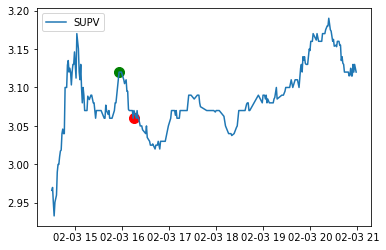

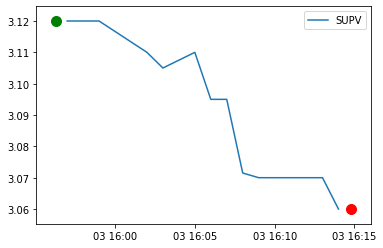

Delta = -0.06000000000000005


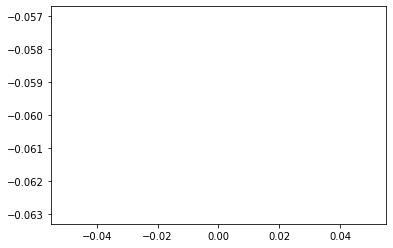

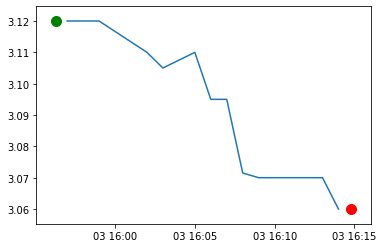

buy time:2020-02-03T15:56:18.57151663Z sell time:2020-02-03T16:14:48.317915476Z
{'rsi': 67.80122658140994, 'macd1': [-0.003777984678070112, -0.0025978235794932303, -0.000845870313320507, 0.0013341029899578416, 0.0046222974242651205], 'macd2': [0.013434431728528207, 0.013182103123556388, 0.013088805829460703, 0.01314197164432196, 0.013489739198667472], 'macd_signal': [-0.0044534863276849326, -0.004082353778046592, -0.0034350570851013748, -0.0024812250700895315, -0.001060520571218601]}
{'rsi': 37.417715158642714, 'macd': [0.002949366056251179, 0.0014358654417958583, 0.00023786671050851638, -0.0006987279724492979, -0.0019389481413454313], 'too_close': 1, 'macd_signal': [0.003860692454267111, 0.0033757270517728605, 0.0027481549835199916, 0.0020587783923261336, 0.0012592330855918205], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.0031981812269372516}
LL analysis


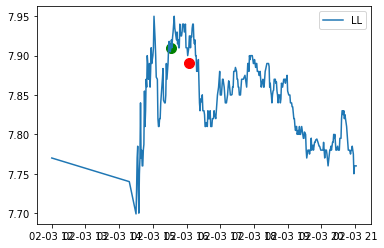

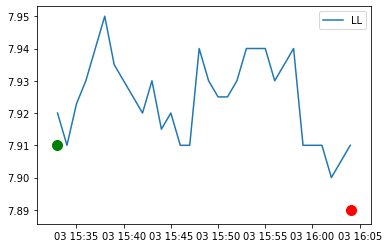

Delta = -0.020000000000000462


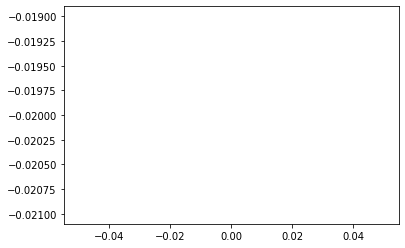

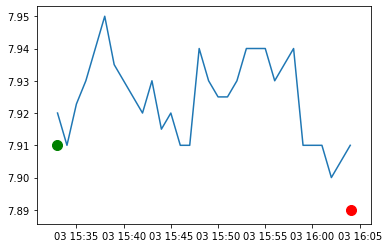

buy time:2020-02-03T15:32:54.119840216Z sell time:2020-02-03T16:04:06.370587199Z
{'rsi': 60.54755659533261, 'macd1': [0.011718526321804035, 0.014626775544028803, 0.01609247763501287, 0.016658569271710277, 0.017717945120726775], 'macd2': [0.030702454525771472, 0.03093136164901189, 0.030962944953282445, 0.030862513687114124, 0.030882288817780434], 'macd_signal': [0.00816556954585443, 0.009457810745489304, 0.010784744123394018, 0.01195950915305727, 0.013111196346591171]}
{'rsi': 41.203175270921015, 'macd': [0.0041199850257847, 0.0027975243576801034, 0.0017307040402263496, 0.00035745828584321515, -0.0009769859160897454], 'too_close': 1, 'macd_signal': [0.005937274833397862, 0.005309324738254311, 0.004593600598648719, 0.003746372136087618, 0.0028017005256521454], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.0037786864417418907}
OPTN analysis


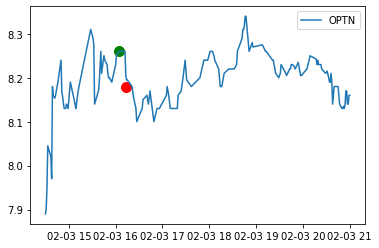

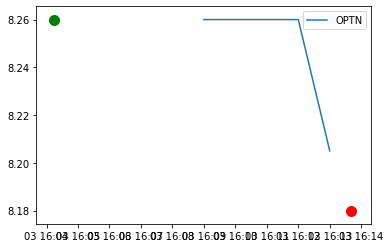

Delta = -0.08000000000000007


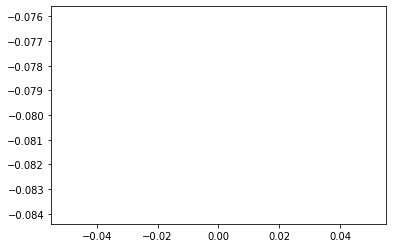

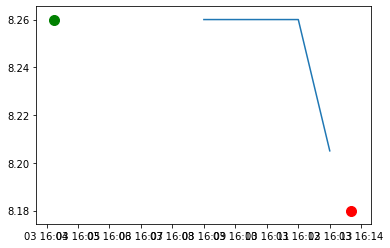

buy time:2020-02-03T16:04:13.777454445Z sell time:2020-02-03T16:13:41.374882064Z
{'rsi': 59.42738015328938, 'macd1': [0.03482317691195469, 0.030461577889418834, 0.029888113380144077, 0.030693654139200888, 0.03177271138189042], 'macd2': [0.050043452352737106, 0.049321292366261815, 0.049217743666403635, 0.04936363069837668, 0.04957883723087342], 'macd_signal': [0.04747051447153076, 0.04406872715510837, 0.041232604400115516, 0.03912481434793259, 0.03765439375472416]}
{'rsi': 47.58066451453236, 'macd': [0.01571215310420726, 0.016529342879664455, 0.01695144734262044, 0.017060211244370294, 0.012767556995807894], 'too_close': 1, 'macd_signal': [0.020937335009508246, 0.02005573658353949, 0.01943487873535568, 0.0189599452371586, 0.01772146758888846], 'data.close <= stop_prices': 1, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.004953910593080566}
VNE analysis


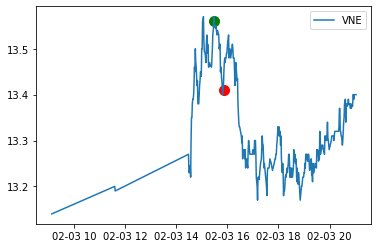

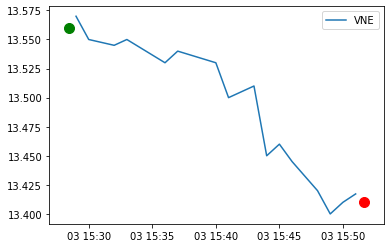

Delta = -0.15000000000000036


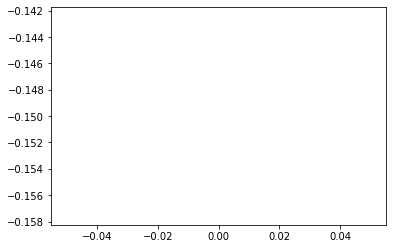

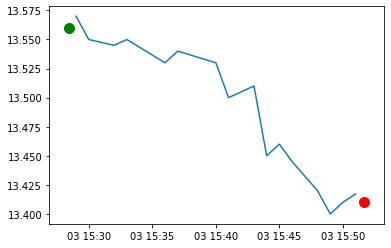

buy time:2020-02-03T15:28:26.897070783Z sell time:2020-02-03T15:51:39.373152248Z
{'rsi': 65.99847954357914, 'macd1': [0.016797081432862626, 0.01730301988376759, 0.01989538738936325, 0.022497437288169664, 0.02587514091500509], 'macd2': [0.052403304321352095, 0.05189476068726684, 0.05182369393605413, 0.051835361520906176, 0.05208306470629687], 'macd_signal': [0.028322629903831532, 0.026118707899818745, 0.024874043797727646, 0.02439872249581605, 0.02469400617965386]}
{'rsi': 37.92992010841589, 'macd': [-0.0023430667896029433, -0.006087793833234656, -0.009965661739528286, -0.01233847229326912, -0.013653149707961276], 'too_close': 0, 'macd_signal': [0.006430754355930518, 0.003927044718097484, 0.0011485034265723295, -0.001548891717395961, -0.003969743315509025], 'data.close <= stop_prices': 1, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.009683406392452252}
AAOI analysis


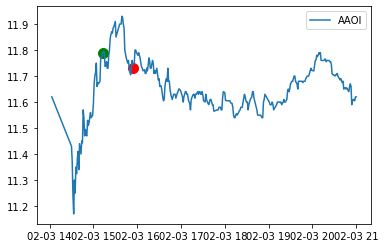

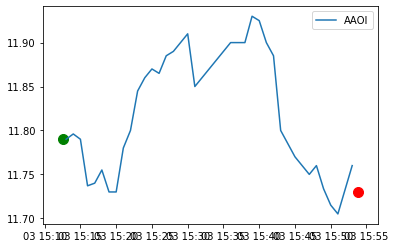

Delta = -0.05999999999999872


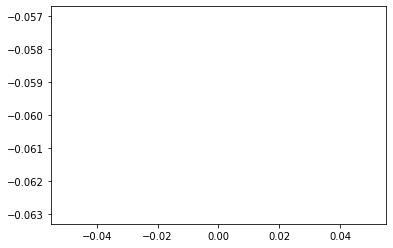

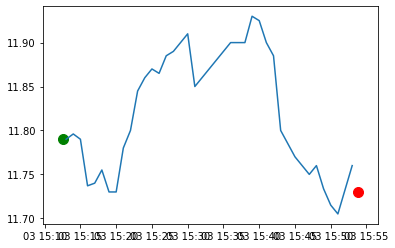

buy time:2020-02-03T15:12:32.845241982Z sell time:2020-02-03T15:53:46.254586843Z
{'rsi': 70.47337781874809, 'macd1': [0.07741793368240124, 0.07471684117167676, 0.07892861380661742, 0.08132896428918812, 0.08467591735343305], 'macd2': [0.04777723667035971, 0.048936577333536846, 0.05136436484118967, 0.053515856882670576, 0.05588951532326192], 'macd_signal': [0.0764177021623577, 0.07607752996422151, 0.0766477467327007, 0.07758399024399817, 0.07900237566588515]}
{'rsi': 36.83691748856382, 'macd': [0.0026426879292440475, -0.0012317257906389045, -0.005606181601057969, -0.009908274679293783, -0.012866941043121471], 'too_close': 0, 'macd_signal': [0.019647510413782474, 0.015471663172898198, 0.011256094218106964, 0.007023220438626815, 0.003045188142277157], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.015912129185398628}
FRAN analysis


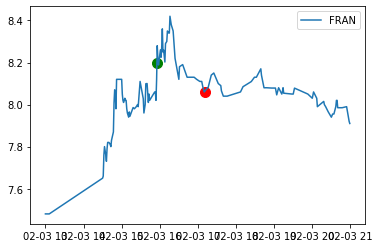

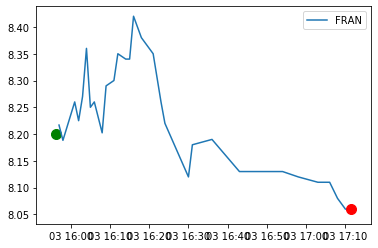

Delta = -0.1399999999999988


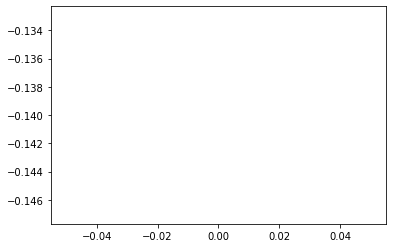

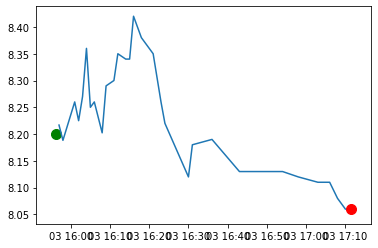

buy time:2020-02-03T15:56:19.611380434Z sell time:2020-02-03T17:11:29.550140995Z
{'rsi': 64.48945915609858, 'macd1': [0.025176753457449408, 0.02554012183120591, 0.022342873442198652, 0.02756049509249614, 0.037716061968454895], 'macd2': [0.027394294612770764, 0.027750084000509823, 0.027393295134131357, 0.02862058647276644, 0.0309834473381434], 'macd_signal': [0.02609849994912668, 0.025986824325542526, 0.025258034148873752, 0.02571852633759823, 0.02811803346376956]}
{'rsi': 37.75057601919808, 'macd': [-0.014941616867448104, -0.017080592733764277, -0.018525501295389546, -0.02096925470320876, -0.023640111193676816], 'too_close': 0, 'macd_signal': [0.0030611897532956366, -0.000967166744116346, -0.004478833654370986, -0.0077769178641385415, -0.010949556530046197], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.012690554663630619}
ANVS analysis


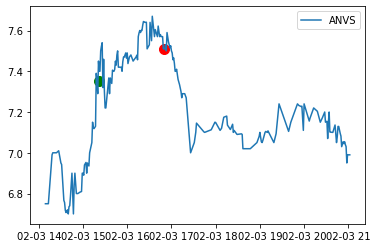

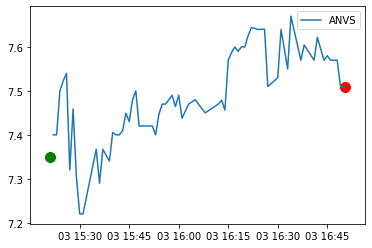

Delta = 0.16000000000000014


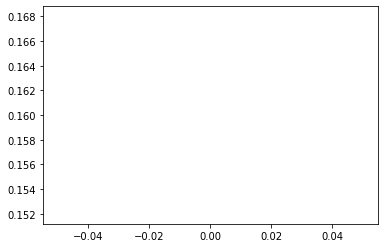

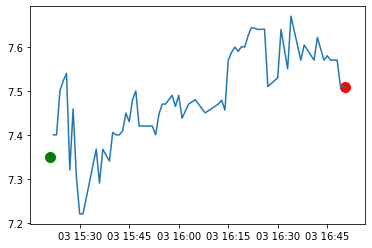

buy time:2020-02-03T15:21:03.490255679Z sell time:2020-02-03T16:50:20.379227943Z
{'rsi': 70.60069703413812, 'macd1': [0.09321406645879105, 0.11526837004981871, 0.12804289998524165, 0.13180593170119792, 0.13803843880969602], 'macd2': [0.062201243474500956, 0.06842863105290853, 0.07340884068653608, 0.07691376951669682, 0.08097501948076413], 'macd_signal': [0.07467873694129712, 0.08279666356300144, 0.09184591084744949, 0.09983791501819918, 0.10747801977649854]}
{'rsi': 44.966902757094665, 'macd': [0.01072722464957998, 0.008785566423275881, 0.007153292916762588, 0.002671608458222785, -0.0008553094115253401], 'too_close': 1, 'macd_signal': [0.016564054238025205, 0.01500835667507534, 0.01343734392341279, 0.01128419683037479, 0.008856295581994763], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.009711604993520103}
PIRS analysis


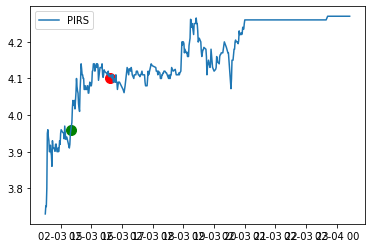

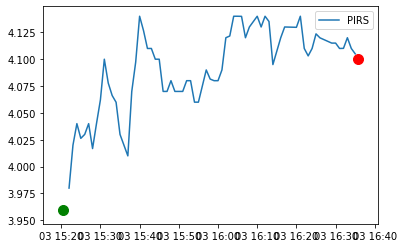

Delta = 0.13999999999999968


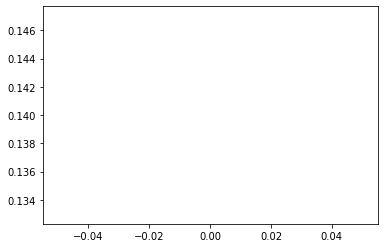

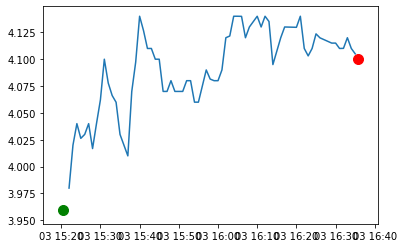

buy time:2020-02-03T15:20:23.610384078Z sell time:2020-02-03T16:35:35.214277034Z
{'rsi': 59.56757458500817, 'macd1': [0.023296590416856944, 0.019416838289056937, 0.016953592738341072, 0.017223658557713684, 0.018036688375652865], 'macd2': [0.030206028862589385, 0.02956798896218915, 0.02909361800390453, 0.02909045844891489, 0.029200961459779684], 'macd_signal': [0.026585489122719845, 0.025151758955987265, 0.023512125712458025, 0.022254432281509157, 0.021410883500337898]}
{'rsi': 46.94330760728905, 'macd': [0.0013295085811710905, 0.000837151024840388, 0.0009569094091954611, 0.0005183197163658448, -8.991017046700023e-05], 'too_close': 1, 'macd_signal': [0.003511910301984582, 0.002976958446555743, 0.0025729486390836864, 0.002162022854540118, 0.0017116362495386943], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.0018015464200056945}
WLL analysis


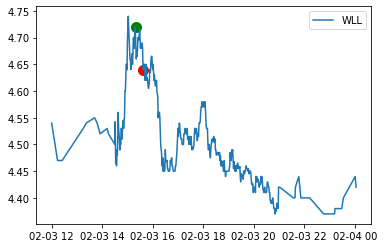

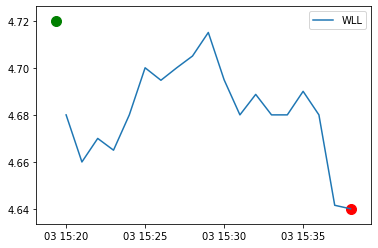

Delta = -0.08000000000000007


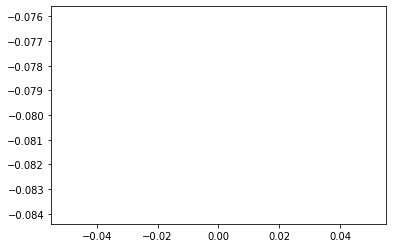

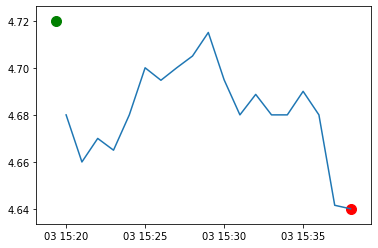

buy time:2020-02-03T15:19:22.894255306Z sell time:2020-02-03T15:38:02.304980426Z
{'rsi': 65.07811627251837, 'macd1': [0.02735858487093079, 0.028126269027549, 0.02681973930378856, 0.02707793123755131, 0.028965939946481], 'macd2': [0.020199926208836594, 0.020880517479814564, 0.02115501505862394, 0.021691999812164298, 0.022551189703666985], 'macd_signal': [0.030719746327556537, 0.030201050867555028, 0.029524788554801736, 0.02903541709135165, 0.02902152166237752]}
{'rsi': 42.00660661288171, 'macd': [0.004503372572259856, 0.00422225323084735, 0.003428884221554185, 0.000771338445201053, -0.001132870451245438], 'too_close': 1, 'macd_signal': [0.00738041769573374, 0.006748784802756462, 0.0060848046865160065, 0.005022111438253016, 0.003791115060353325], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.004923985511598763}
GRWG analysis


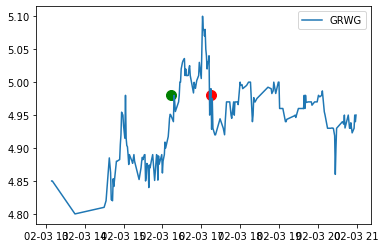

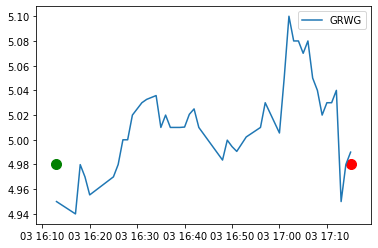

Delta = 0.0


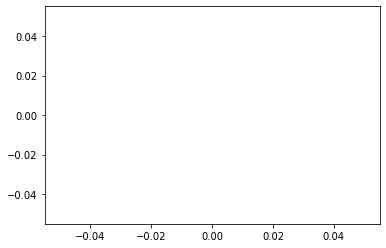

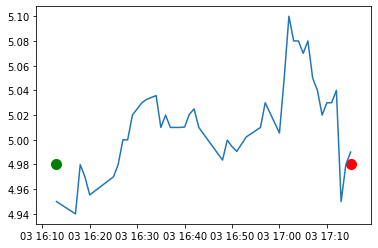

buy time:2020-02-03T16:12:59.96432082Z sell time:2020-02-03T17:15:06.493342274Z
{'rsi': 68.5490105293059, 'macd1': [0.0059657441729763505, 0.00801566627467487, 0.010535512180283035, 0.013594246013107103, 0.019345741226708846], 'macd2': [0.0121989422995874, 0.012508909061926587, 0.012975601538493642, 0.013625724282366747, 0.014905784073060424], 'macd_signal': [0.0031400175559024406, 0.004115147299656926, 0.005399220275782149, 0.007038225423247139, 0.00949972858393948]}
{'rsi': 42.78357045166692, 'macd': [0.00838038221512516, 0.006998112229591236, 0.006349614679439952, 0.0010865047094590352, -0.0014702888348043786], 'too_close': 1, 'macd_signal': [0.01165579659949075, 0.010724259725510847, 0.009849330716296668, 0.008096765514929142, 0.0061833546449824375], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.007653643479786816}
HMI analysis


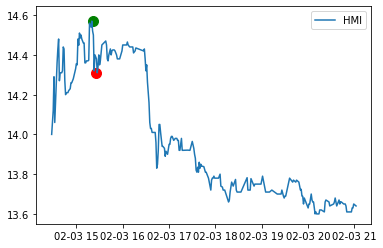

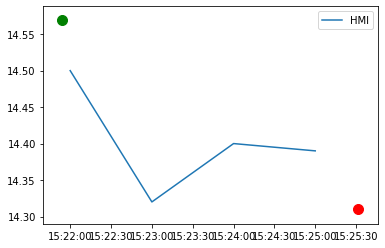

Delta = -0.2599999999999998


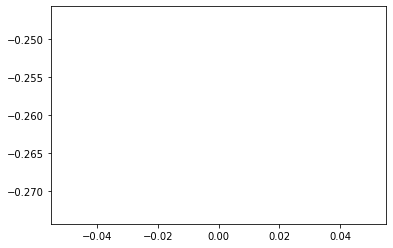

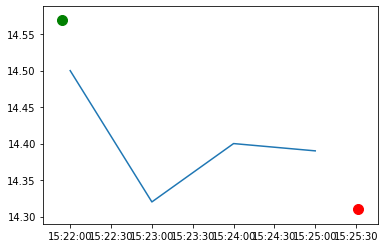

buy time:2020-02-03T15:21:54.028290275Z sell time:2020-02-03T15:25:31.535604673Z
{'rsi': 67.09386415866288, 'macd1': [0.02740381301387984, 0.023566184141644797, 0.03516045002075785, 0.04224016887167892, 0.049706727300501186], 'macd2': [0.05203920000533735, 0.05104279485527918, 0.05302564194455961, 0.05444364617673081, 0.05614258786146564], 'macd_signal': [0.04435668958787956, 0.04019858849863261, 0.03919096080305766, 0.03980080241678191, 0.04178198739352577]}
{'rsi': 43.155574389875504, 'macd': [0.029581178530078134, 0.02881176435860766, 0.018487392739819697, 0.014358175988299138, 0.006278810000251767], 'too_close': 1, 'macd_signal': [0.02469687408271462, 0.025519852137893227, 0.02411336025827852, 0.022162323404282643, 0.018985620723476468], 'data.close <= stop_prices': 1, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.012706810723224701}
DBD analysis


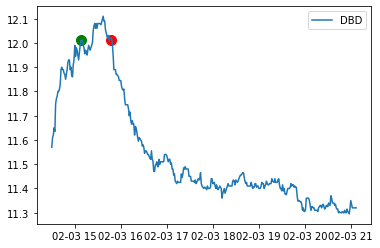

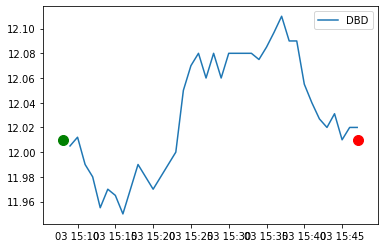

Delta = 0.0


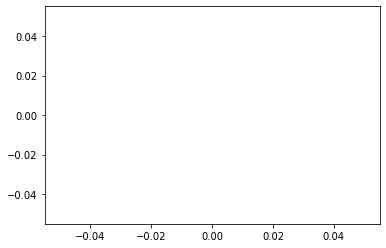

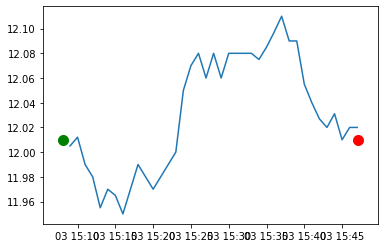

buy time:2020-02-03T15:08:03.568175389Z sell time:2020-02-03T15:47:03.239331007Z
{'rsi': 64.81040706224547, 'macd1': [0.05891873266276626, 0.05438118471399456, 0.05259955957220264, 0.05299743663123202, 0.05430064587541317], 'macd2': [0.0691693041509378, 0.06877031376501996, 0.06877304941753515, 0.06914538150020988, 0.06969722260226341], 'macd_signal': [0.06436066518100979, 0.06236476908760674, 0.06041172718452592, 0.05892886907386714, 0.05800322443417635]}
{'rsi': 45.449998562796516, 'macd': [0.007233374366425238, 0.005282321874947371, 0.00259731575334321, 0.0009908523371144895, -0.0004192600954926462], 'too_close': 0, 'macd_signal': [0.01512635297814997, 0.01315754675750945, 0.011045500556676201, 0.00903457091276386, 0.007143804711112559], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.007563064806605205}
EZPW analysis


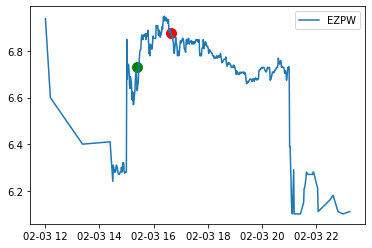

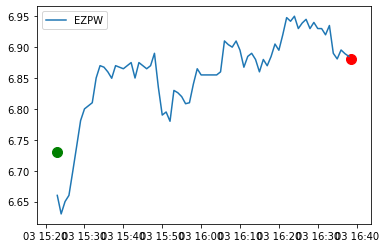

Delta = 0.14999999999999947


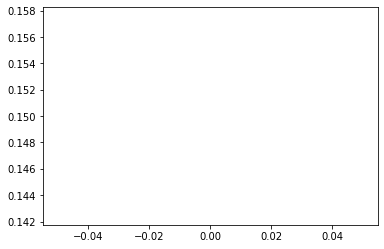

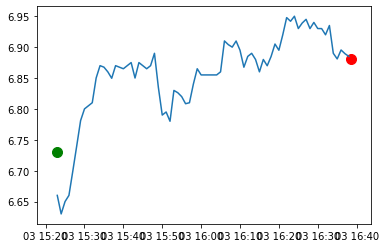

buy time:2020-02-03T15:22:49.351427016Z sell time:2020-02-03T16:38:37.401984585Z
{'rsi': 65.62755174141931, 'macd1': [0.058786736359158986, 0.05674166306822048, 0.05879248413009819, 0.06221016463008677, 0.06616521157873745], 'macd2': [0.04888121973736137, 0.04953031503178007, 0.050910341825995964, 0.052595987682127365, 0.05446095656026806], 'macd_signal': [0.0765498311146953, 0.07258819750540033, 0.0698290548303399, 0.06830527679028928, 0.06787726374797891]}
{'rsi': 44.89727021059067, 'macd': [0.006631508487880744, 0.003928539344370208, 0.002524556383915133, 0.0010860689292240266, -0.00027750660597902765], 'too_close': 1, 'macd_signal': [0.010215501257442635, 0.00895810887482815, 0.007671398376645547, 0.006354332487161243, 0.005027964668533188], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.005305471274512216}
ETM analysis


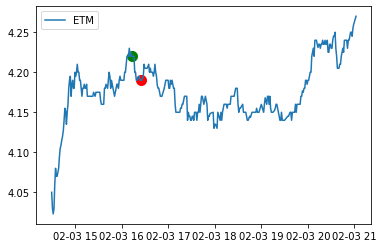

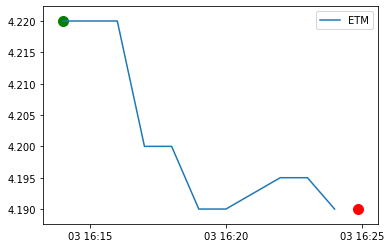

Delta = -0.02999999999999936


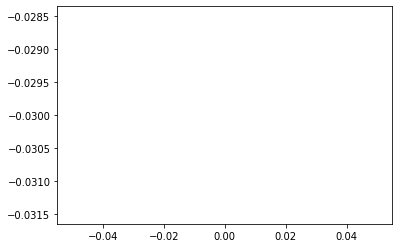

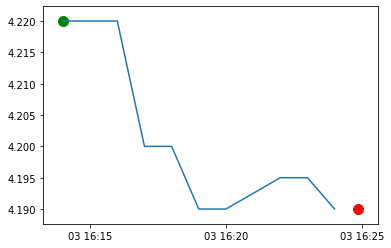

buy time:2020-02-03T16:13:58.986167058Z sell time:2020-02-03T16:24:51.371377579Z
{'rsi': 67.26369616360316, 'macd1': [0.00948830421656055, 0.010305952226675075, 0.011626833690705496, 0.011731492003655752, 0.012078657439686502], 'macd2': [0.0146489387922486, 0.01475207012820512, 0.014983296407102387, 0.01501213226560516, 0.015094620382899215], 'macd_signal': [0.006319160673349561, 0.007116518984014664, 0.00801858192535283, 0.008761163941013414, 0.009424662640748031]}
{'rsi': 41.75431929413493, 'macd': [0.002400336054873442, 0.001242338447744018, 0.000583608644165956, 6.273336028428389e-05, -0.0006036984630028996], 'too_close': 0, 'macd_signal': [0.004949062213881036, 0.004207717460653632, 0.003482895697356097, 0.0027988632299417344, 0.0021183508913528077], 'data.close <= stop_prices': 0, 'data.close >= target_prices': 0, 'distance_macd_to_signal_macd': -0.0027220493543557074}


In [16]:
for symbol in minute_history:
    print (f'{symbol} analysis')
    plt.plot(minute_history[symbol]['close'], label=symbol)


    for trade in trade_details[symbol]:
        plt.scatter(trade[0], trade[1], c='g', s=100)
        plt.scatter(trade[2], trade[3], c='r', s=100)
   
    plt.legend()
    plt.show()
    
    min_time = trade_details[symbol][0][0]
    max_time = trade_details[symbol][-1][2]
    delta = 0 
    accumulative_delta = []
    plt.plot(minute_history[symbol]['close'][min_time:max_time], label=symbol)
    for trade in trade_details[symbol]:
        plt.scatter(trade[0], trade[1], c='g', s=100)
        plt.scatter(trade[2], trade[3], c='r', s=100)
        trade_delta = trade[3] - trade[1]
        delta += trade_delta 
        accumulative_delta.append(delta)
    plt.legend()
    plt.show()
    
    print(f'Delta = {delta}')
    plt.plot(range(len(accumulative_delta)), accumulative_delta)
    plt.show()
    
    for trade in trade_details[symbol]:
        plt.plot(minute_history[symbol]['close'][trade[0]:trade[2]])
        plt.scatter(trade[0], trade[1], c='g', s=100)
        plt.scatter(trade[2], trade[3], c='r', s=100)
        plt.show()
        print(f"buy time:{trade[0]} sell time:{trade[2]}")
        print(trade[4])
        print(trade[5])
    